In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
import os

In [6]:
plt.rcParams['figure.dpi'] = 200

In [3]:
home_dir=os.getcwd()
print(home_dir)

/Users/valsson/WorkTmp-4/masterclass-22-11/Solution


In [4]:
# kB*T at 300 K in kJ/mol
kBT=2.494353

## Exercise 1 - Biasing with one CV
It is assumed that exercise has already been run.

### Time evolution of the CVs

#### Distance CV

(0.2, 0.7)

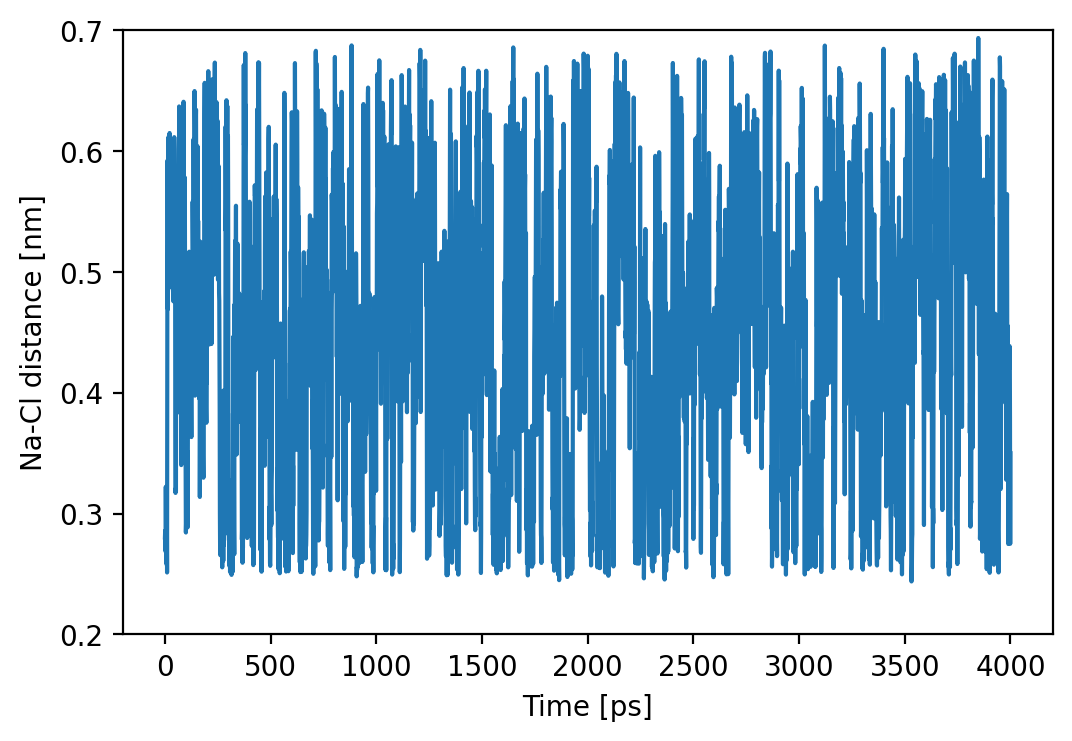

In [7]:
colvar_data = np.loadtxt("./Exercise-1/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
# the colvar file is outputted every 0.25 ps, only plot every 1.0 ps
plt.plot(time[::4],distance[::4],'-')
plt.xlabel("Time [ps]")
plt.ylabel("Na-Cl distance [nm]")
plt.ylim([0.2,0.7])

As we can see, the biased distance CV is diffusive during the biased simulation

#### Solvation of the Na atom (coordination number)

Text(0, 0.5, 'Solvation of Na')

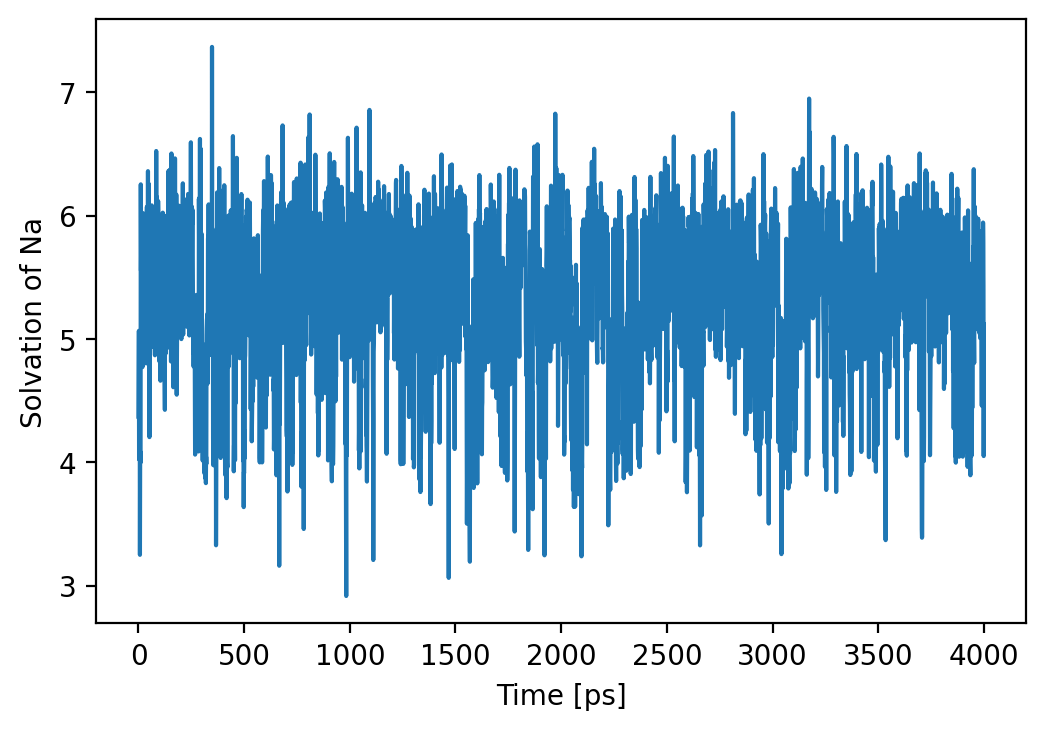

In [8]:
# the colvar file is outputted every 0.25 ps, only plot every 1.0 ps
plt.plot(time[::4],coord[::4],'-')
plt.xlabel("Time [ps]")
plt.ylabel("Solvation of Na")

#### Coupling between distance and solvation CV

Text(0, 0.5, 'Solvation of Na')

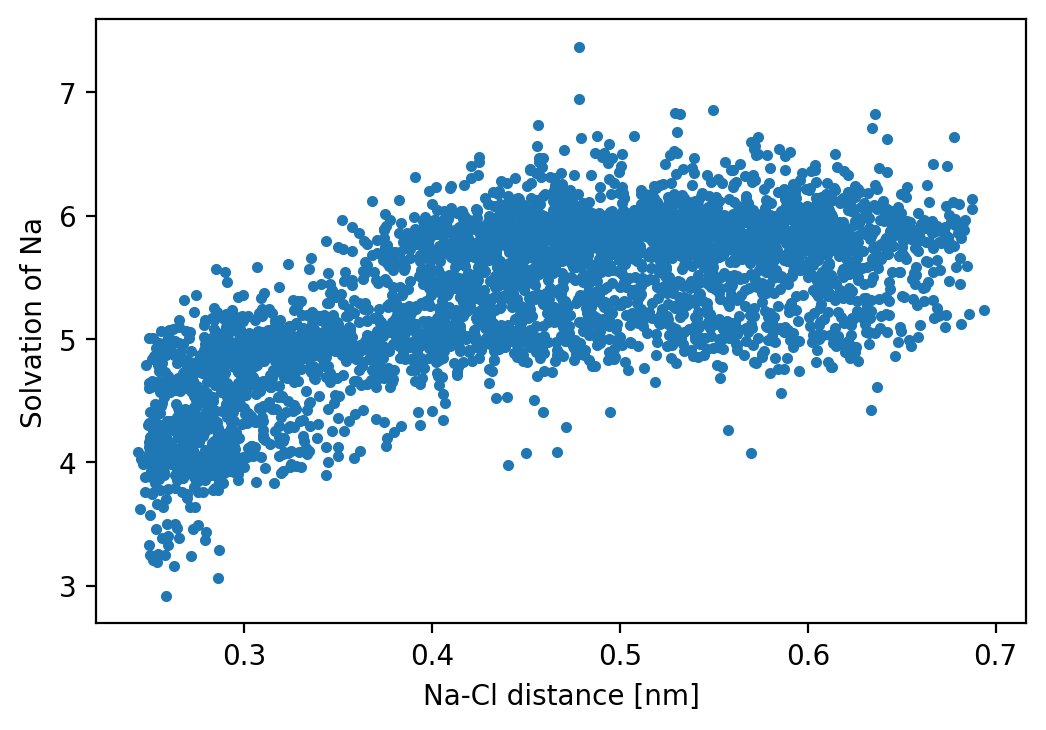

In [9]:
# the colvar file is outputted every 0.25 ps, only plot every 1.0 ps
plt.plot(distance[::4],coord[::4],'.')
plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Solvation of Na")

### Time evoluation of the coeffients

In [10]:
%%bash
# Extract the time series of the coefficents
cd Exercise-1/
for i in `seq 25`
do
  ./ExtractCoeff.sh ${i} > coeff.${i}.data
done  

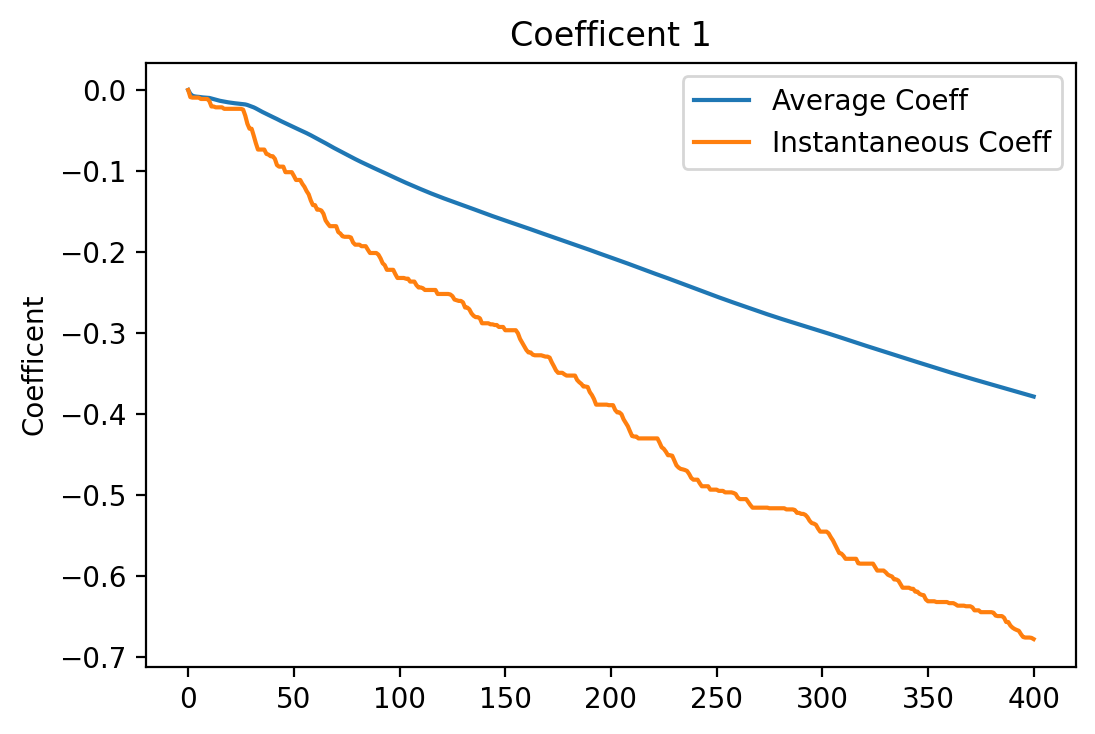

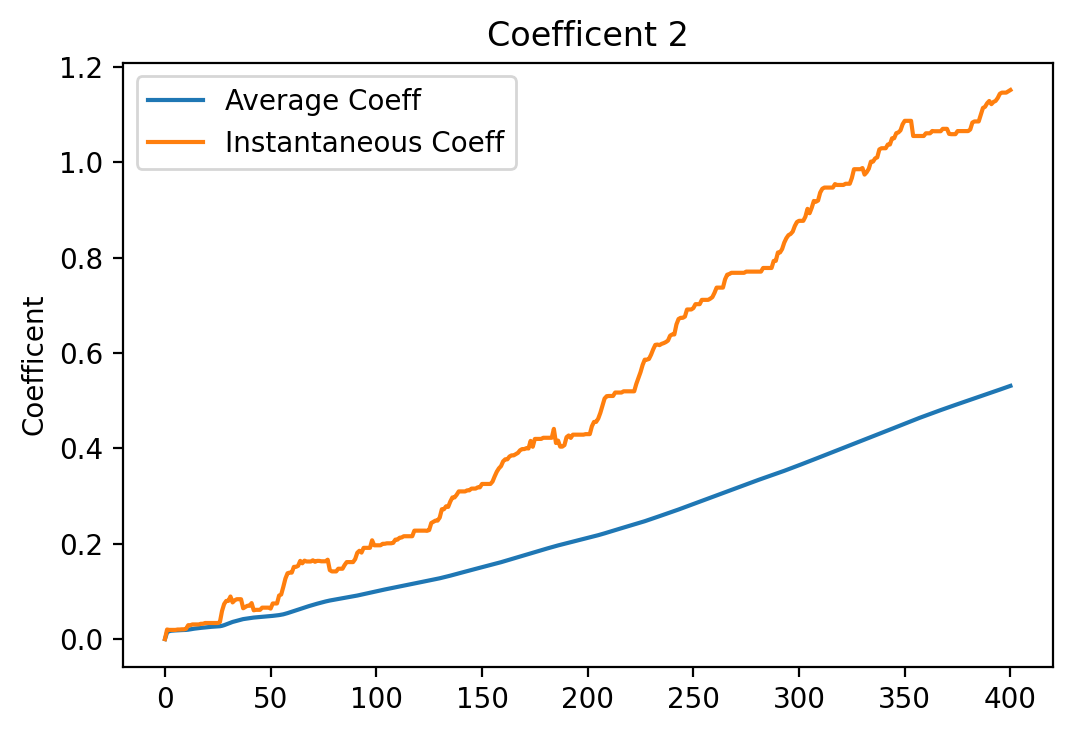

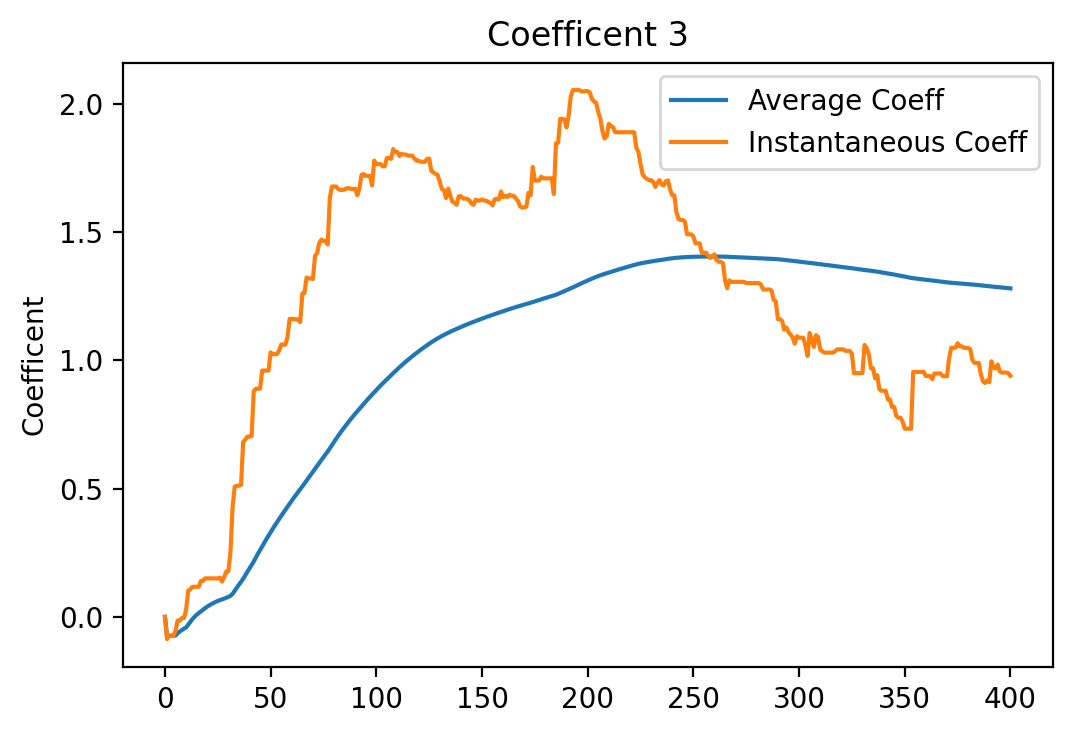

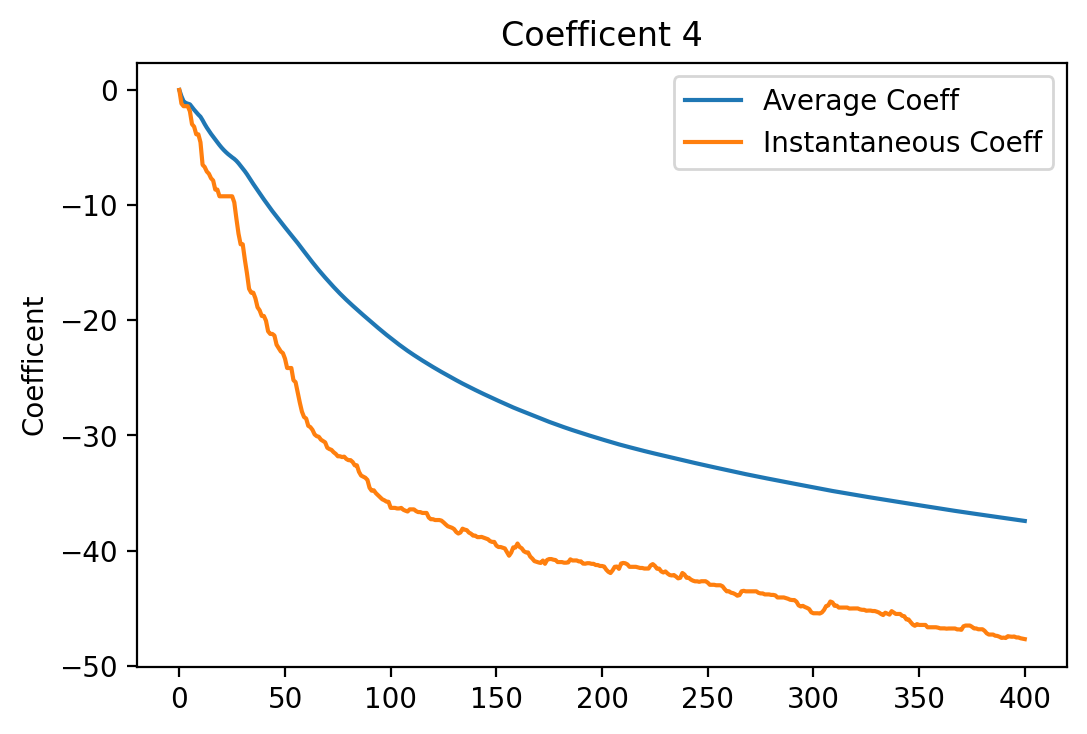

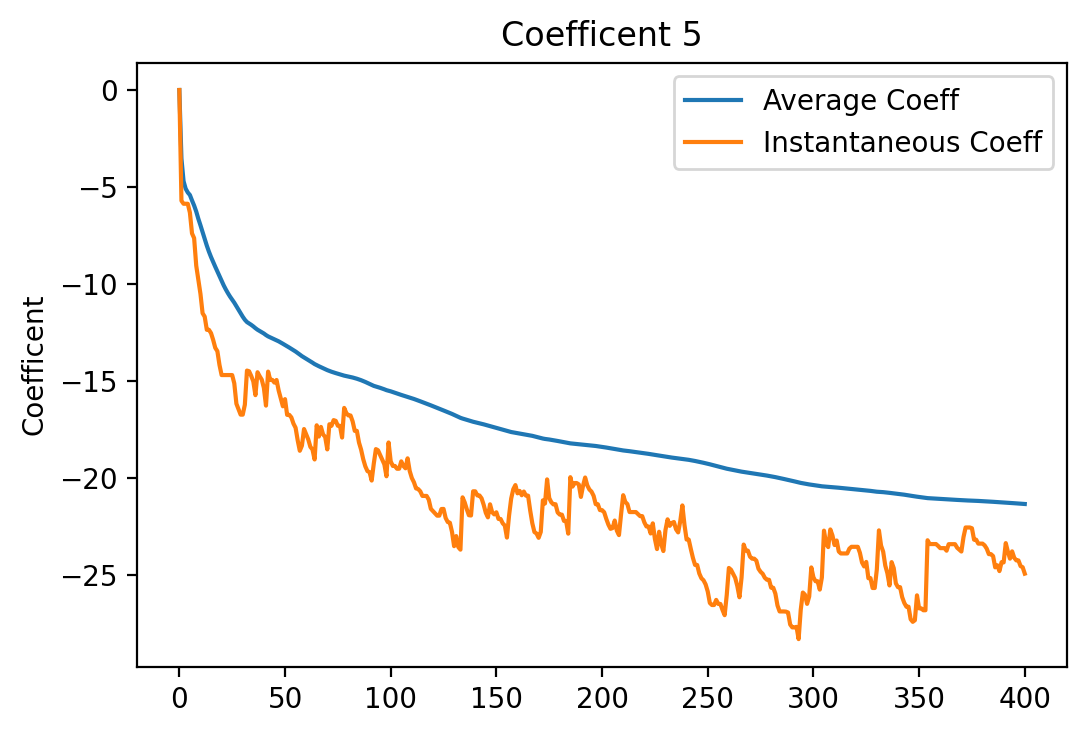

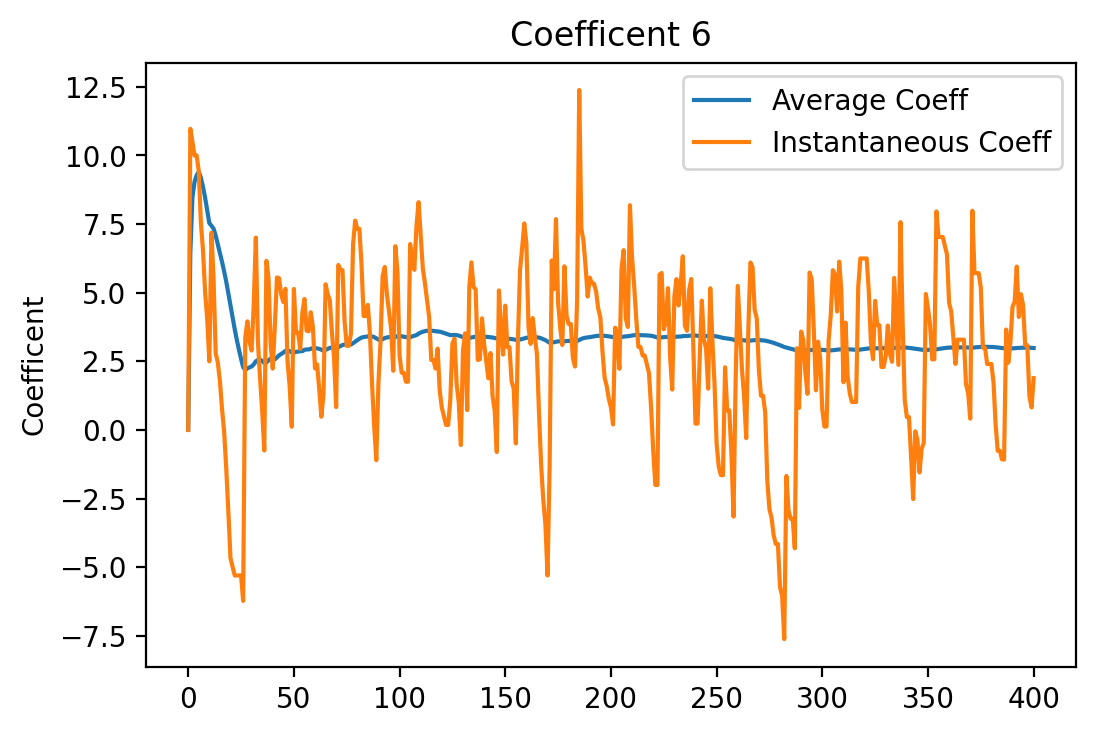

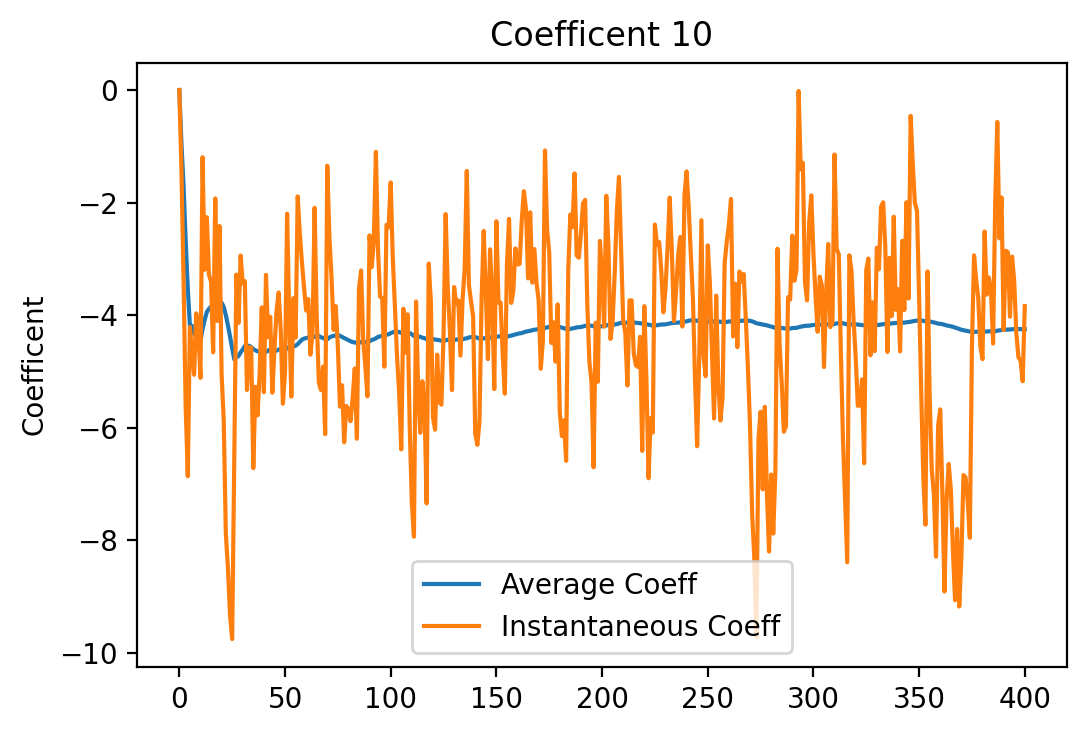

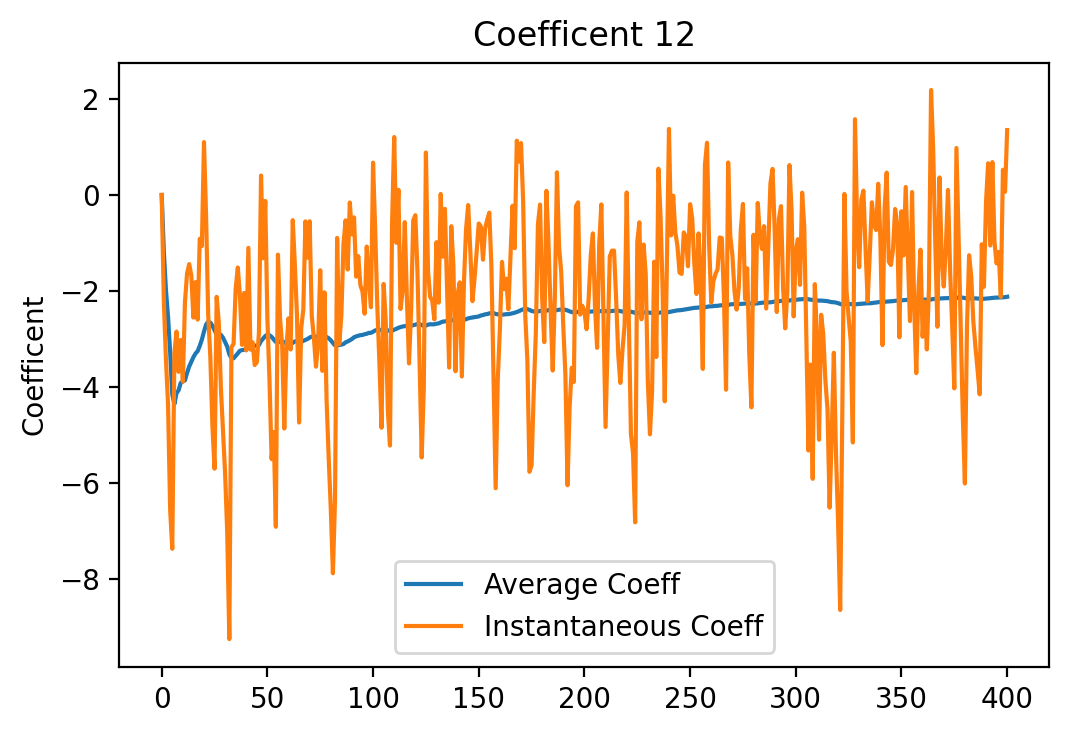

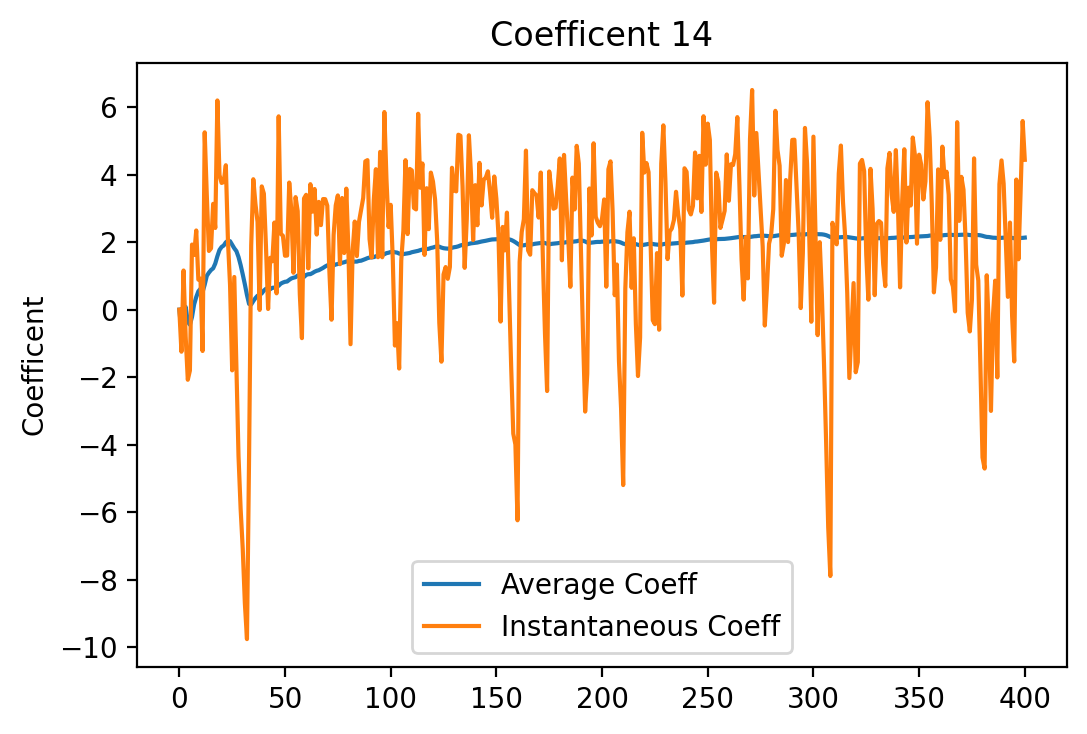

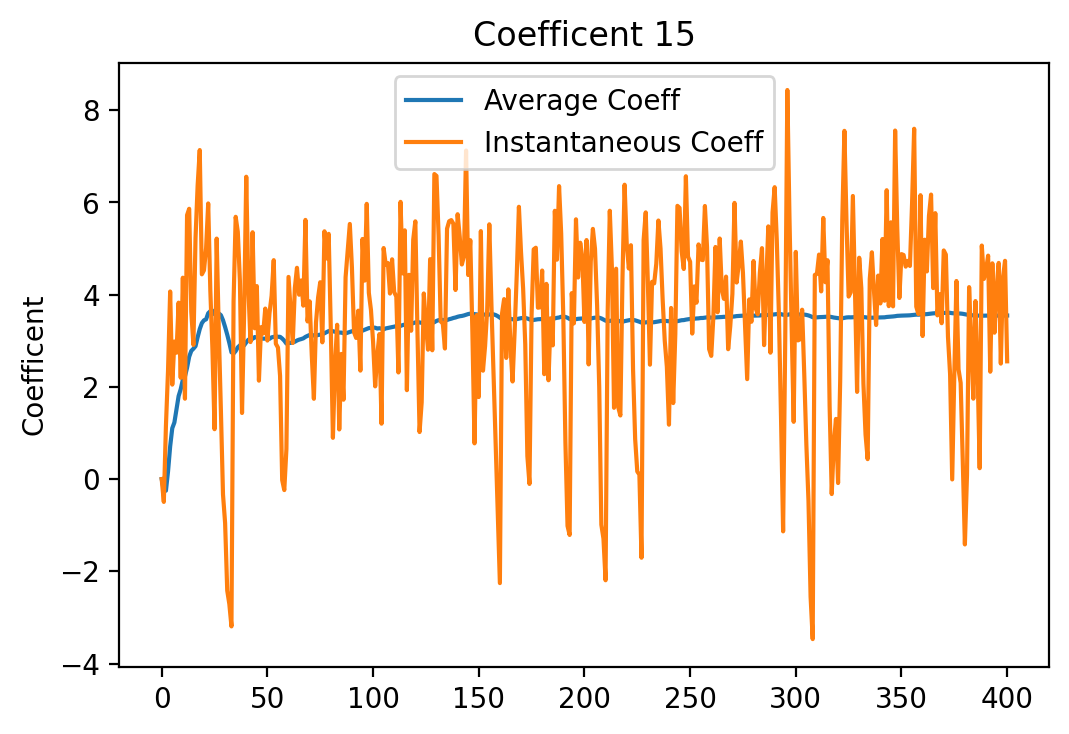

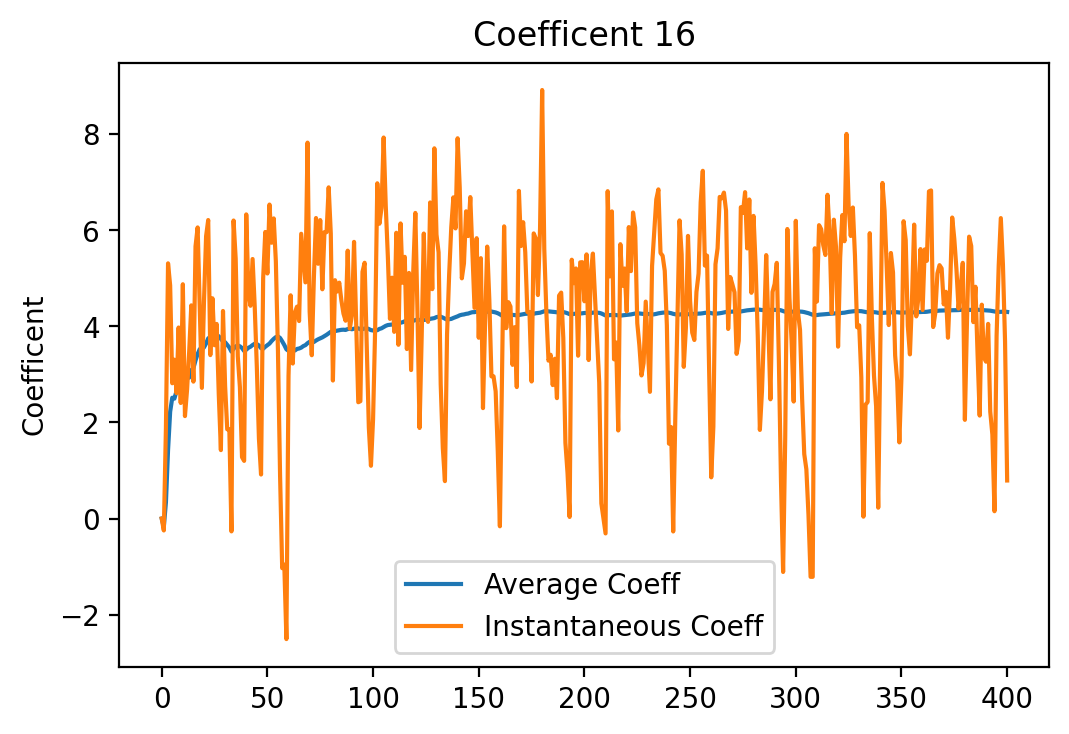

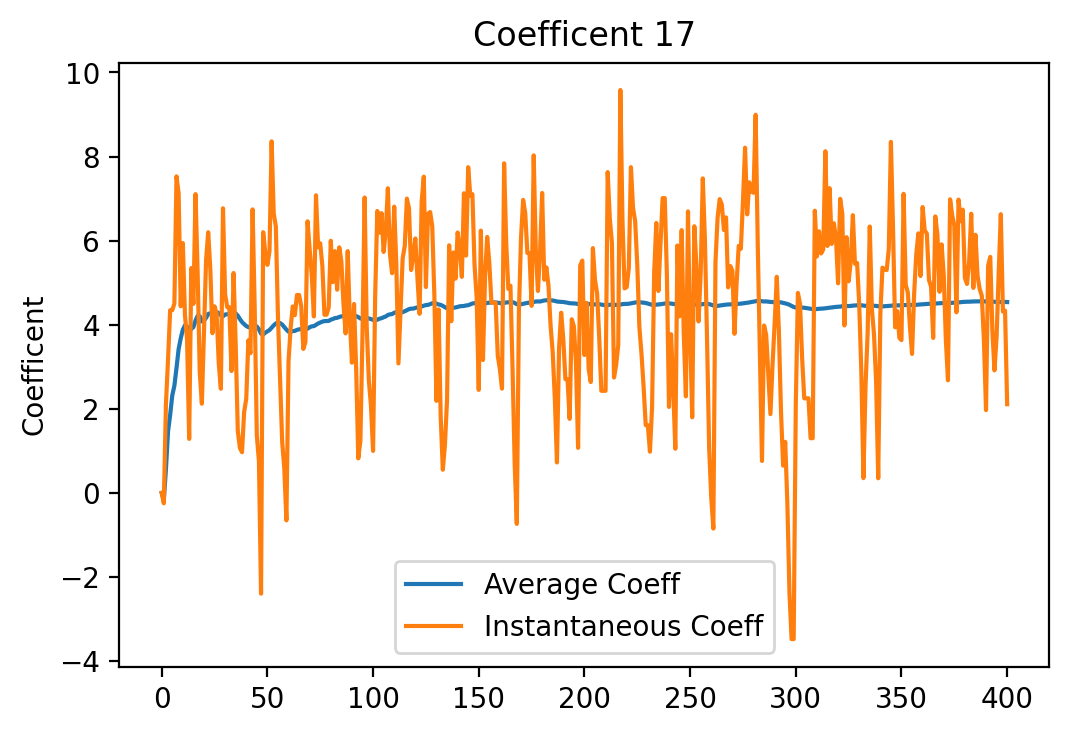

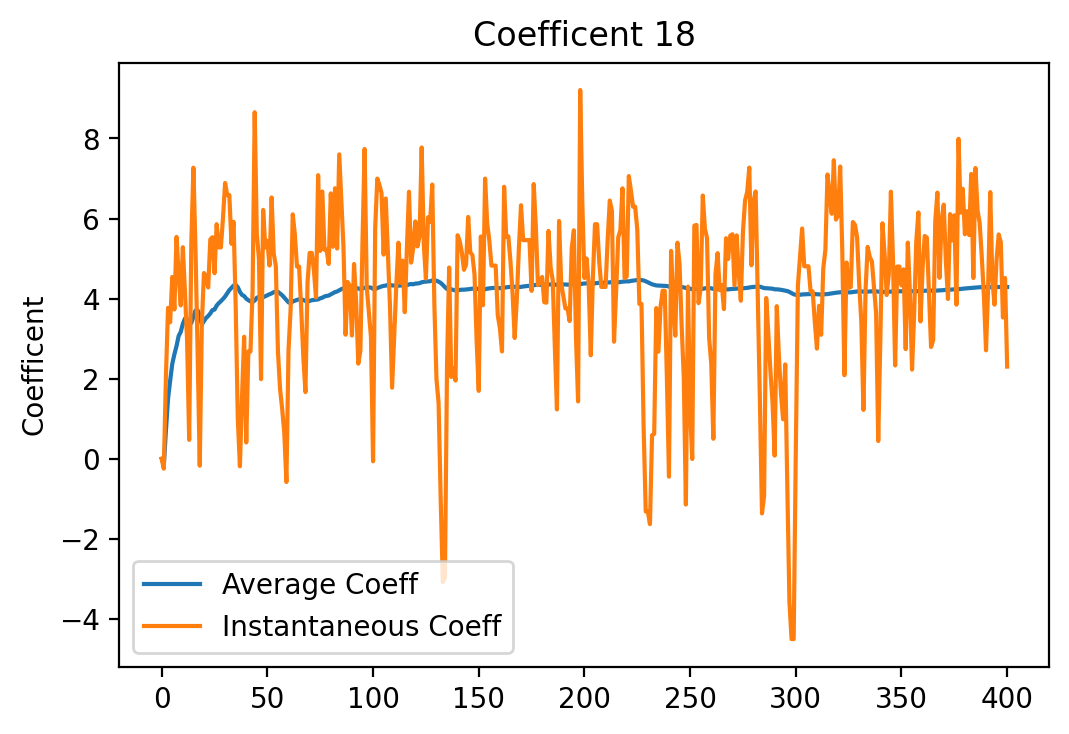

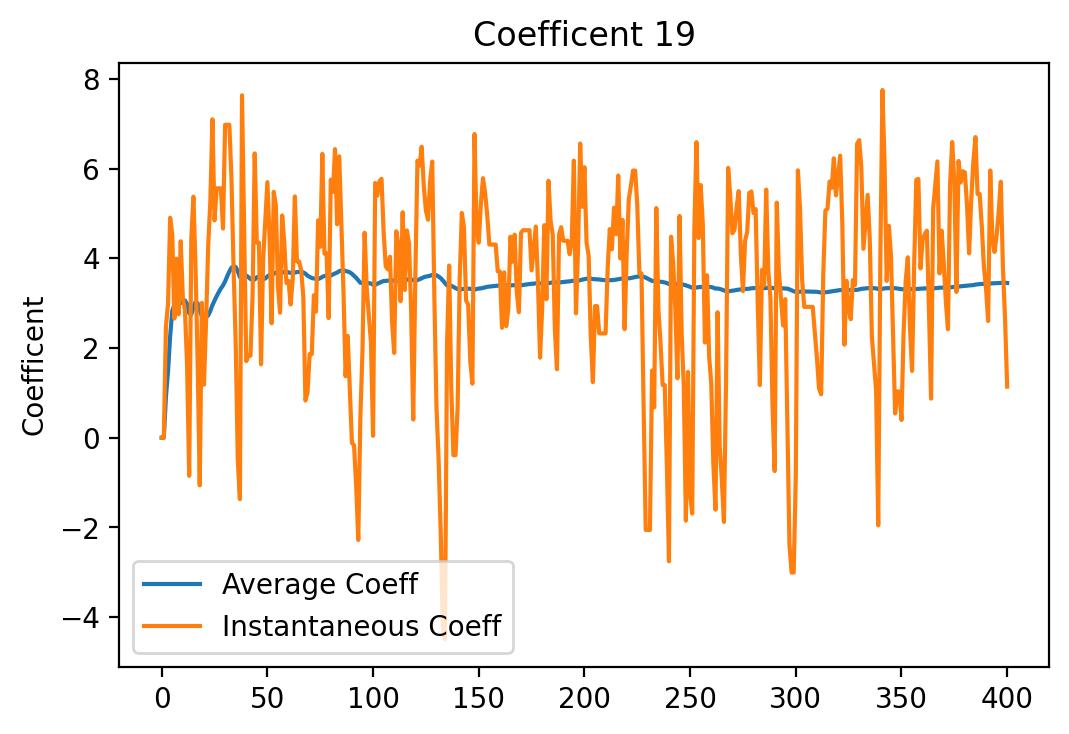

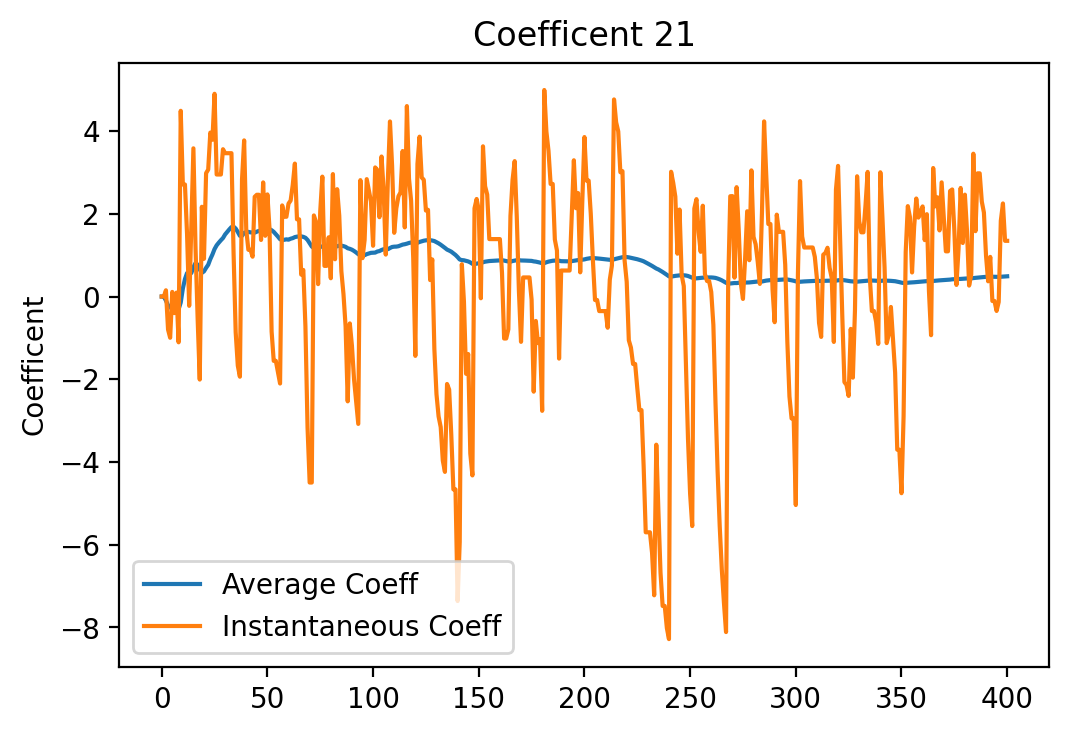

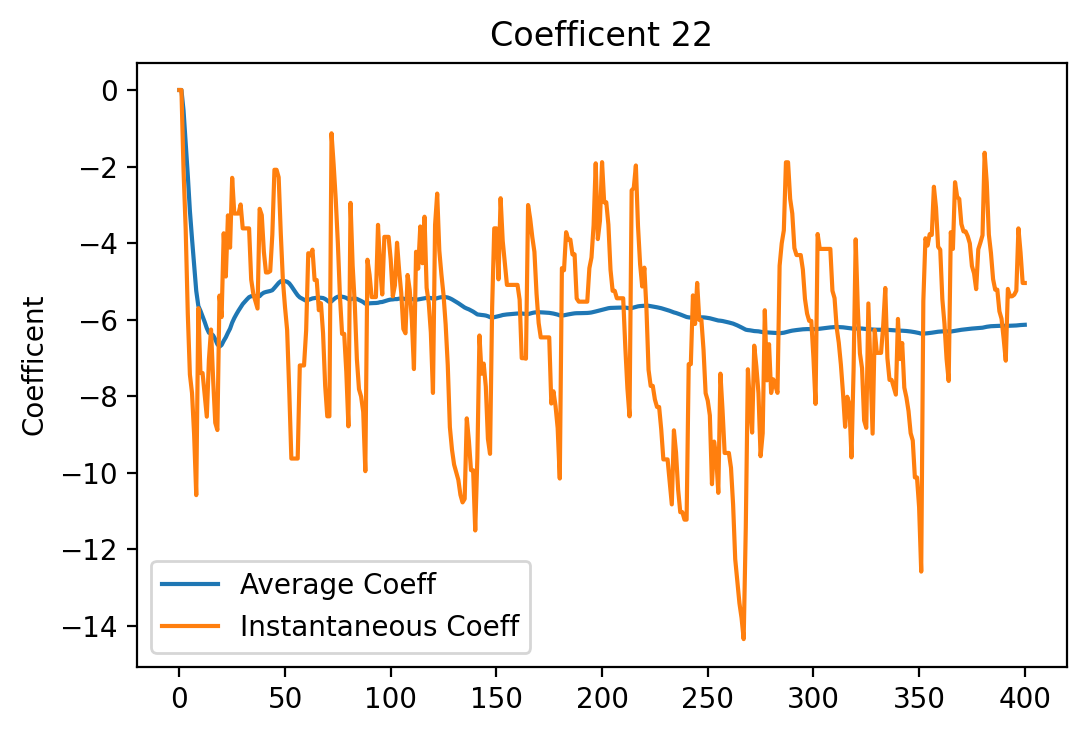

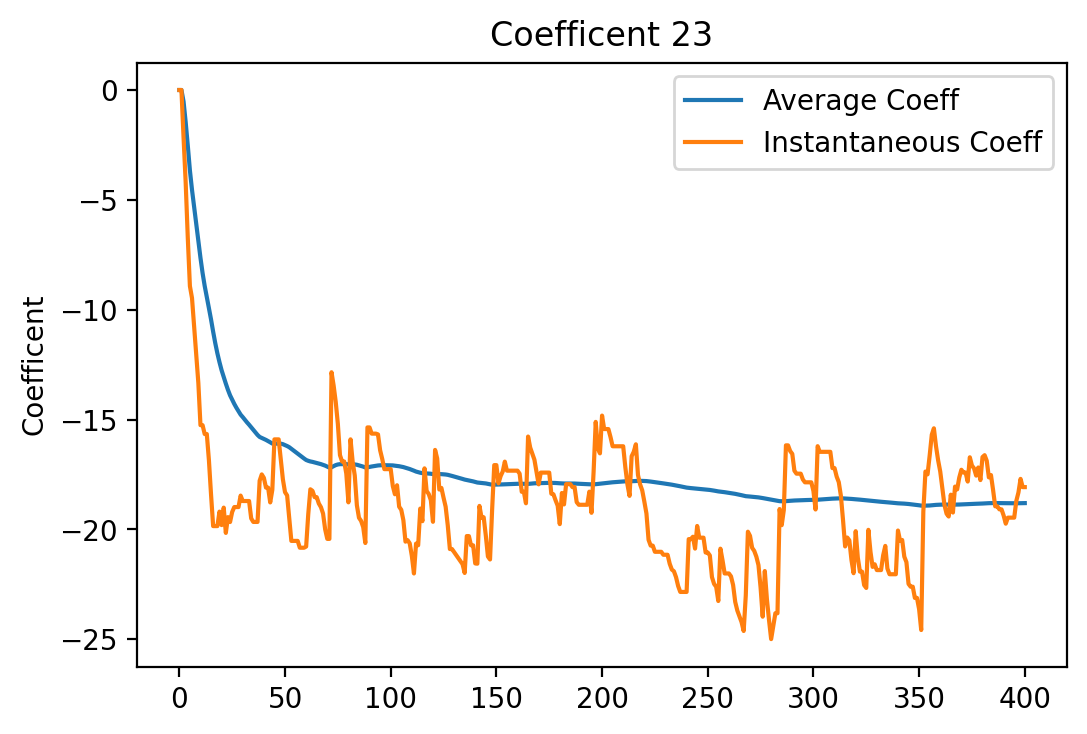

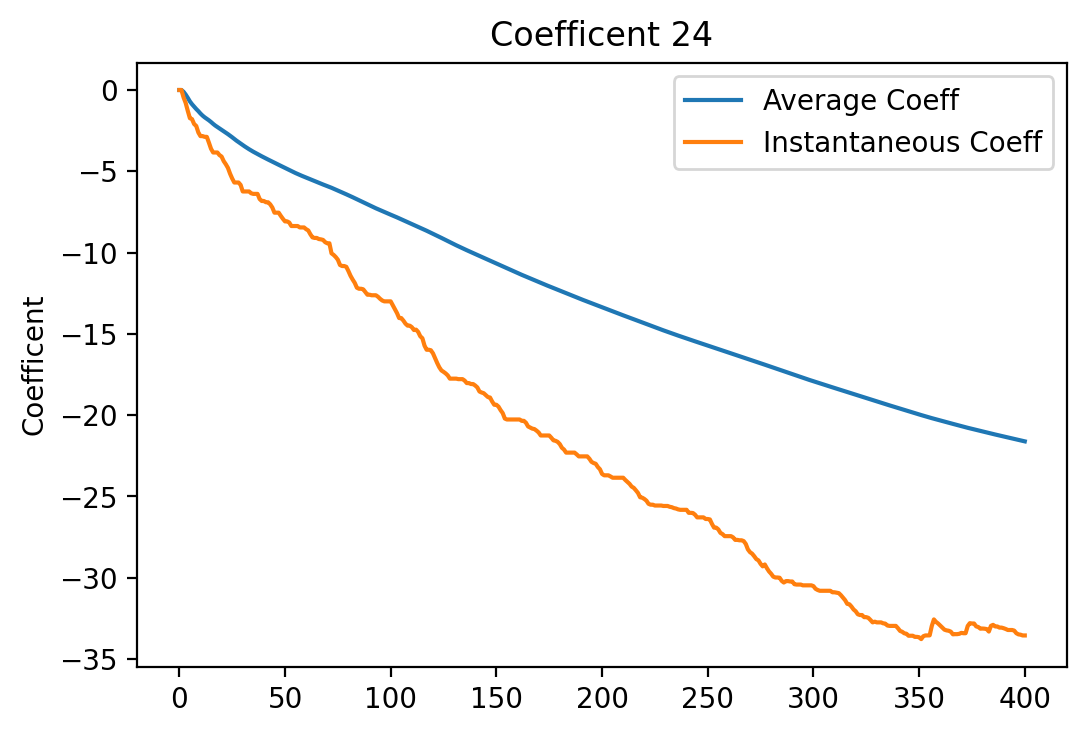

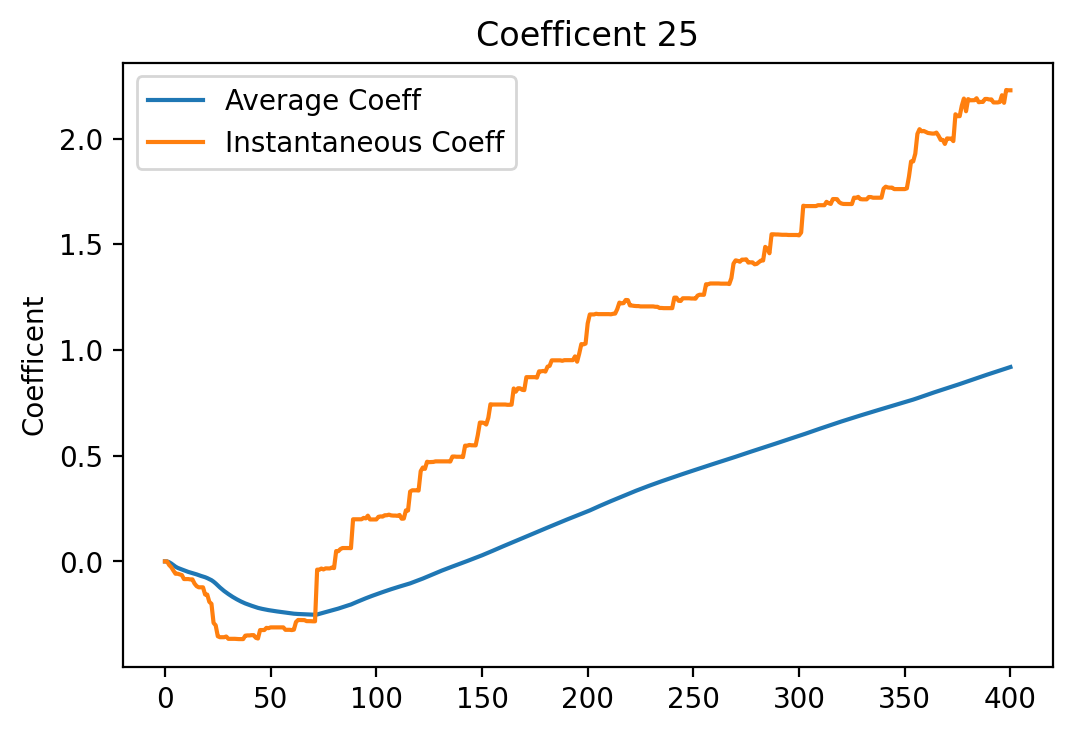

In [11]:
for i in range(1,26):
    coeff_data = np.loadtxt("./Exercise-1/coeff.{0}.data".format(i))
    plt.plot(coeff_data[:,1],label="Average Coeff")
    plt.plot(coeff_data[:,2],label="Instantaneous Coeff")
    plt.ylabel("Coefficent".format(i))
    plt.legend()
    plt.title("Coefficent {0}".format(i))
    plt.show()

### Convergence of the FES

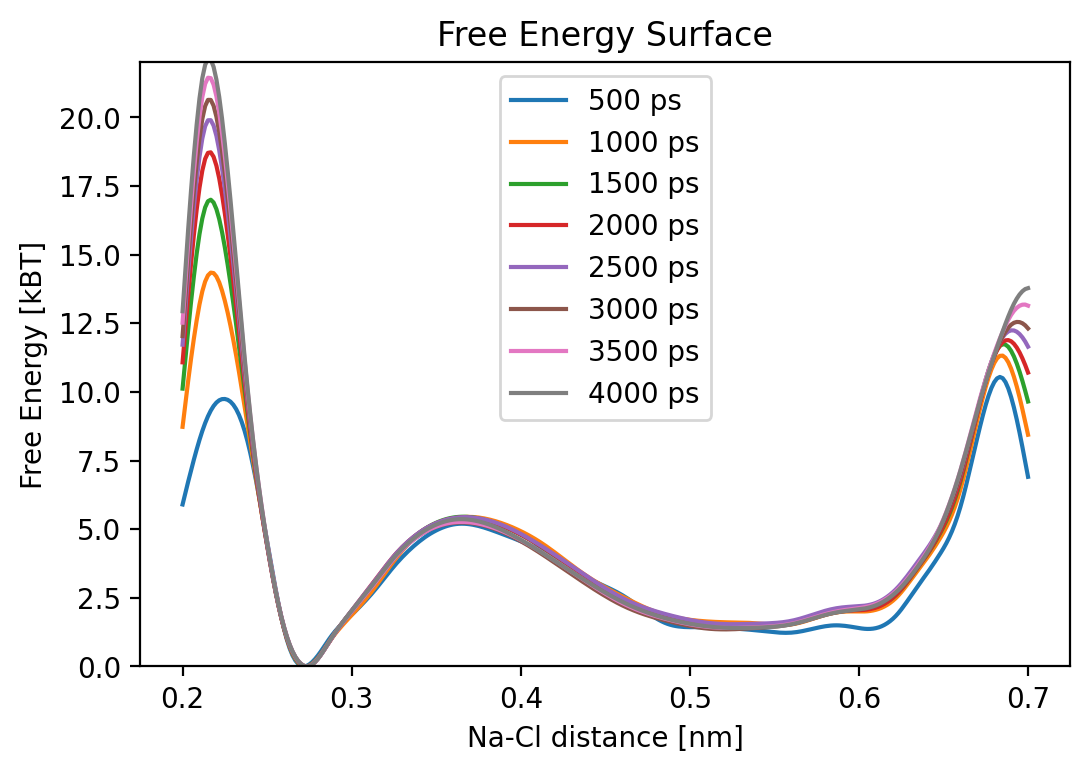

In [12]:
# Each iteration is 1 ps
for iter in range(500,4001,500):
    fes_data = np.loadtxt("./Exercise-1/fes.ves.iter-{0}.data".format(iter))
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Free Energy [kBT]")
    plt.title("Free Energy Surface")
    plt.legend()
    plt.ylim([0,22])

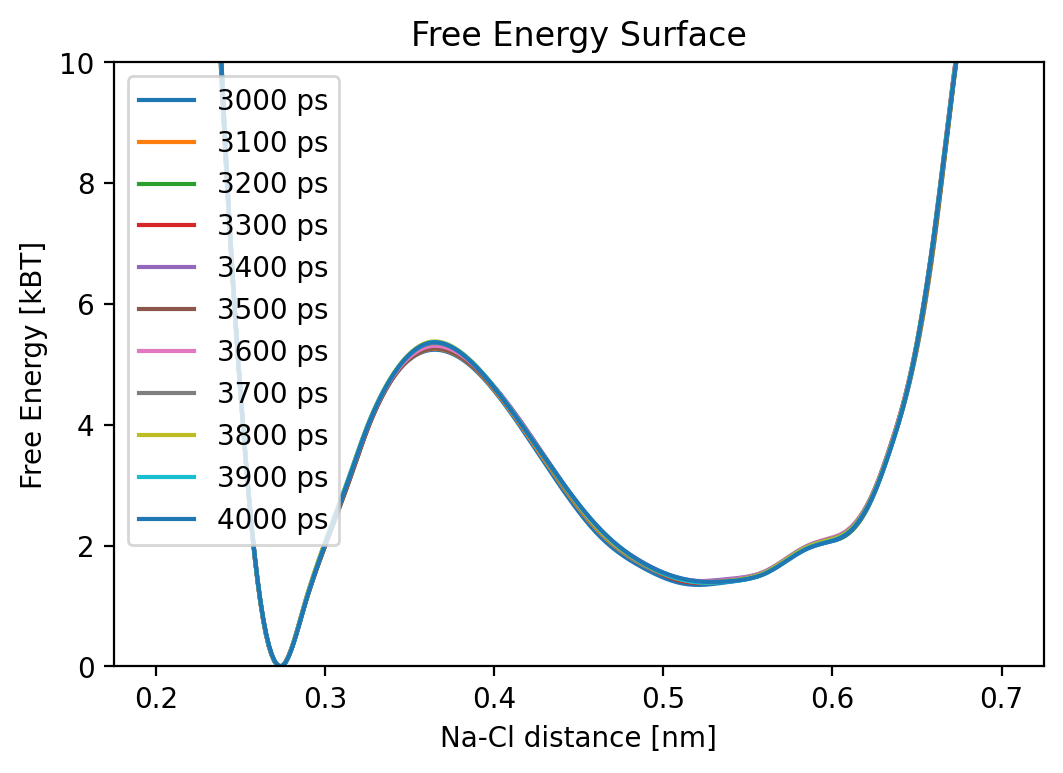

In [13]:
# Each iteration is 1 ps
for iter in range(3000,4001,100):
    fes_data = np.loadtxt("./Exercise-1/fes.ves.iter-{0}.data".format(iter))
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Free Energy [kBT]")
    plt.legend()
    plt.title("Free Energy Surface")
    plt.ylim([0,10])

### Convergence of free energy difference

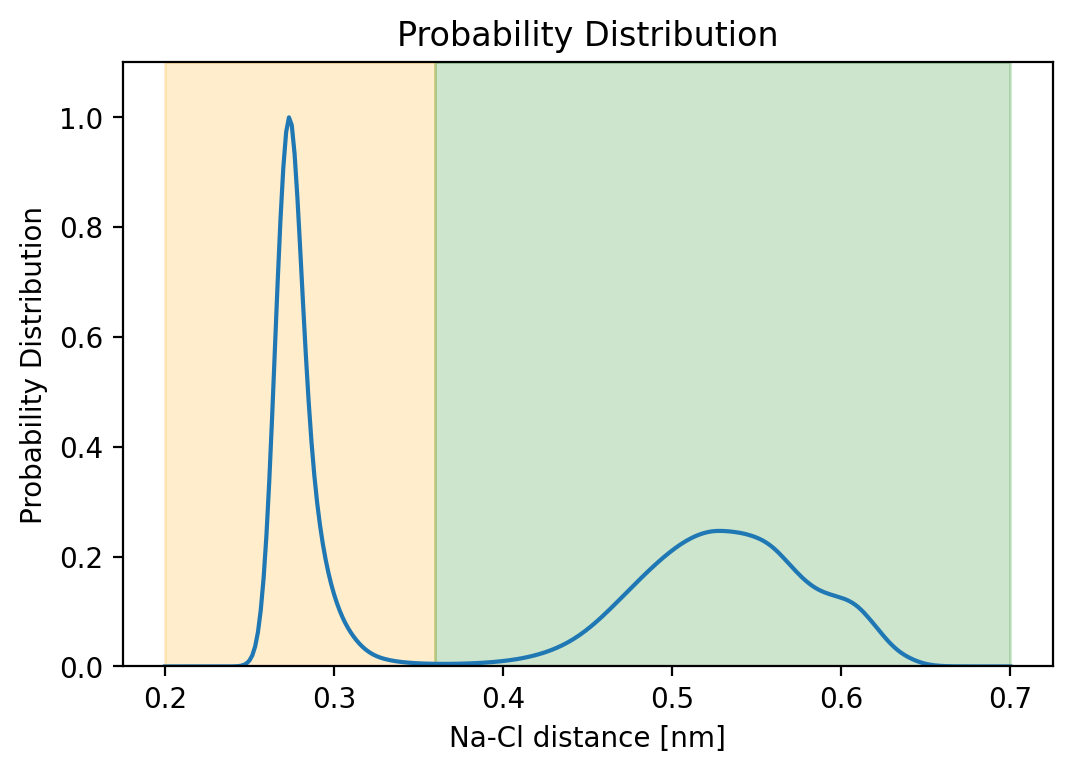

In [14]:
last_iter=4000
fes_data = np.loadtxt("./Exercise-1/fes.ves.iter-{0}.data".format(last_iter))
#plt.plot(fes_data[:,0],fes_data[:,1]/kBT)
plt.plot(fes_data[:,0],np.exp(-fes_data[:,1]/kBT))
plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Probability Distribution")
plt.title("Probability Distribution")
plt.ylim([0,1.1])
barrier_location=0.36
plt.axvspan(0.2,barrier_location,alpha=0.2,color='orange')
plt.axvspan(barrier_location,0.7,alpha=0.2,color='green')

In [15]:
def calc_free_energy_difference(fes_file):
    barrier_location=0.36
    fes_data = np.loadtxt(fes_file)
    distance = fes_data[:,0]
    fes = fes_data[:,1]
    prob = np.exp(-fes/kBT)
    prob_A = 0.0
    prob_B = 0.0
    for i in range(prob.size):
        if(distance[i]<barrier_location): 
            prob_A += prob[i]
        if(distance[i]>barrier_location): 
            prob_B += prob[i]
    free_energy_difference = -np.log(prob_A/prob_B)
    return free_energy_difference

(0.0, 1.0)

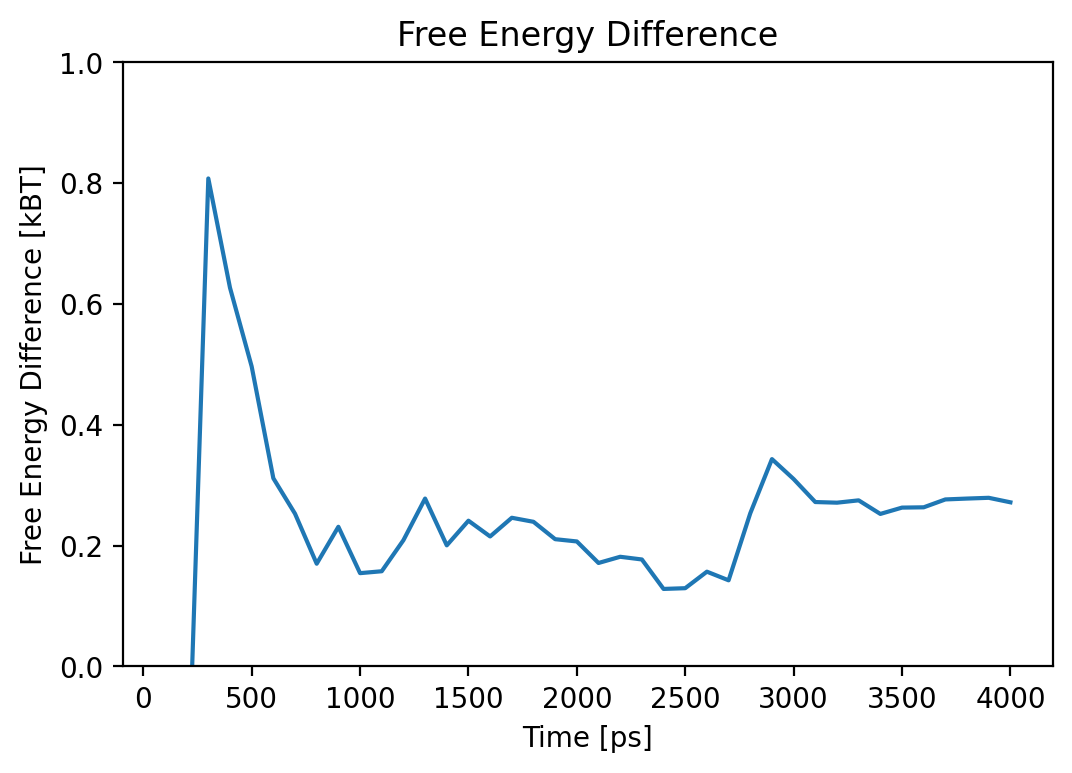

In [16]:
iteration_ex1=[]
free_energy_difference_ex1=[]

for iter in range(100,4001,100):
    iteration_ex1.append(iter)
    fes_filename="./Exercise-1/fes.ves.iter-{0}.data".format(iter)
    fe_diff = calc_free_energy_difference(fes_filename)
    free_energy_difference_ex1.append(fe_diff)

plt.plot(iteration_ex1,free_energy_difference_ex1)
plt.xlabel("Time [ps]")
plt.ylabel("Free Energy Difference [kBT]")
plt.title("Free Energy Difference")
plt.ylim([0.0,1.0])

### Convergence of the bias potential and target distribution

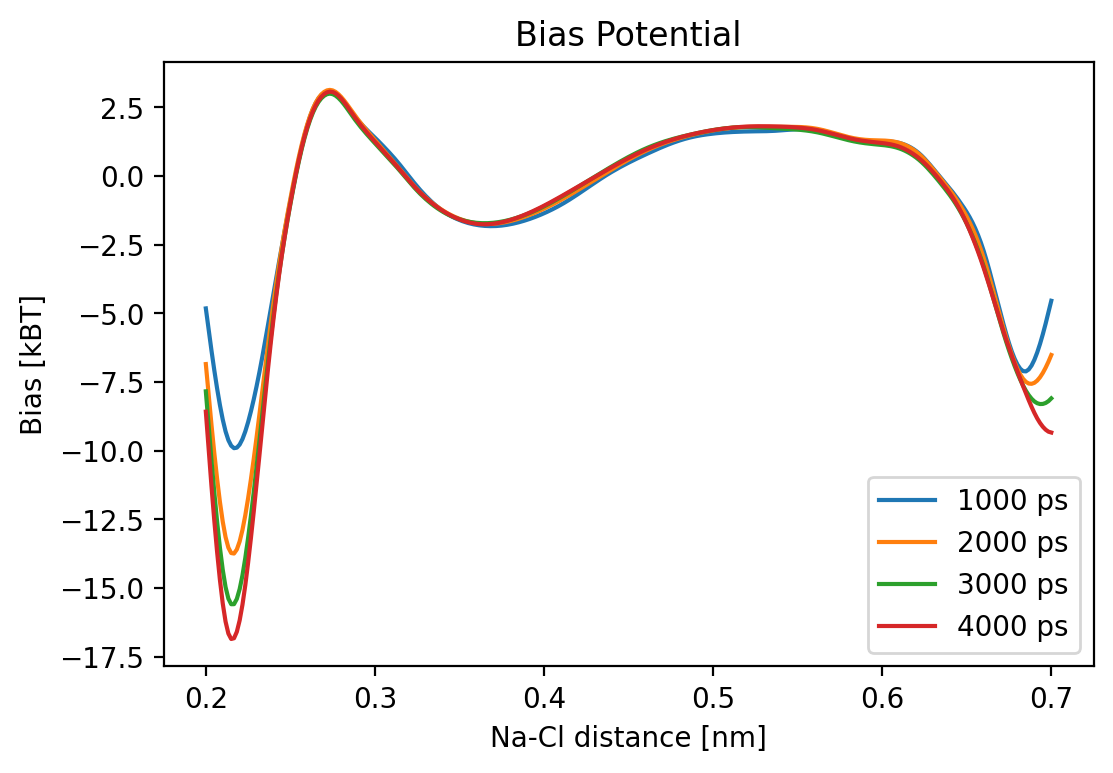

In [17]:
# Each iteration is 1 ps
for iter in range(1000,4001,1000):
    bias_data = np.loadtxt("./Exercise-1/bias.ves.iter-{0}.data".format(iter))
    plt.plot(bias_data[:,0],bias_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Bias [kBT]")
    plt.legend()
    plt.title("Bias Potential")
    # plt.ylim([0,22])

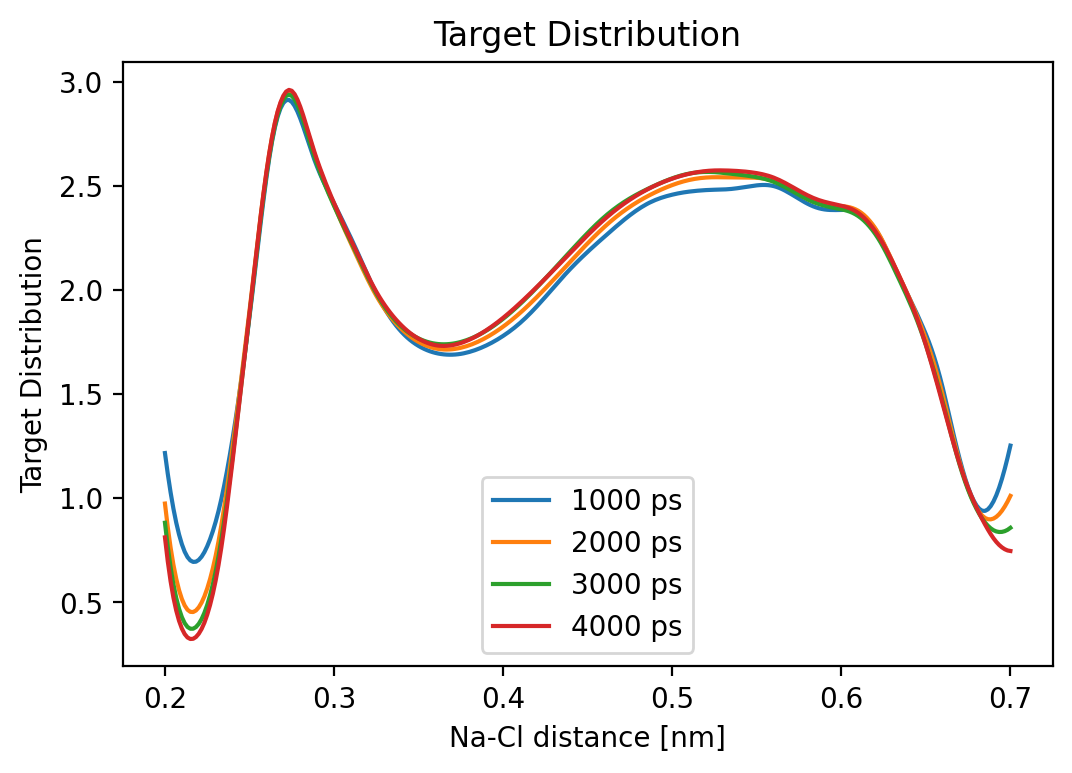

In [18]:
# Each iteration is 1 ps
for iter in range(1000,4001,1000):
    bias_data = np.loadtxt("./Exercise-1/targetdist.ves.iter-{0}.data".format(iter))
    plt.plot(bias_data[:,0],bias_data[:,1],label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Target Distribution")
    plt.legend()
    plt.title("Target Distribution")

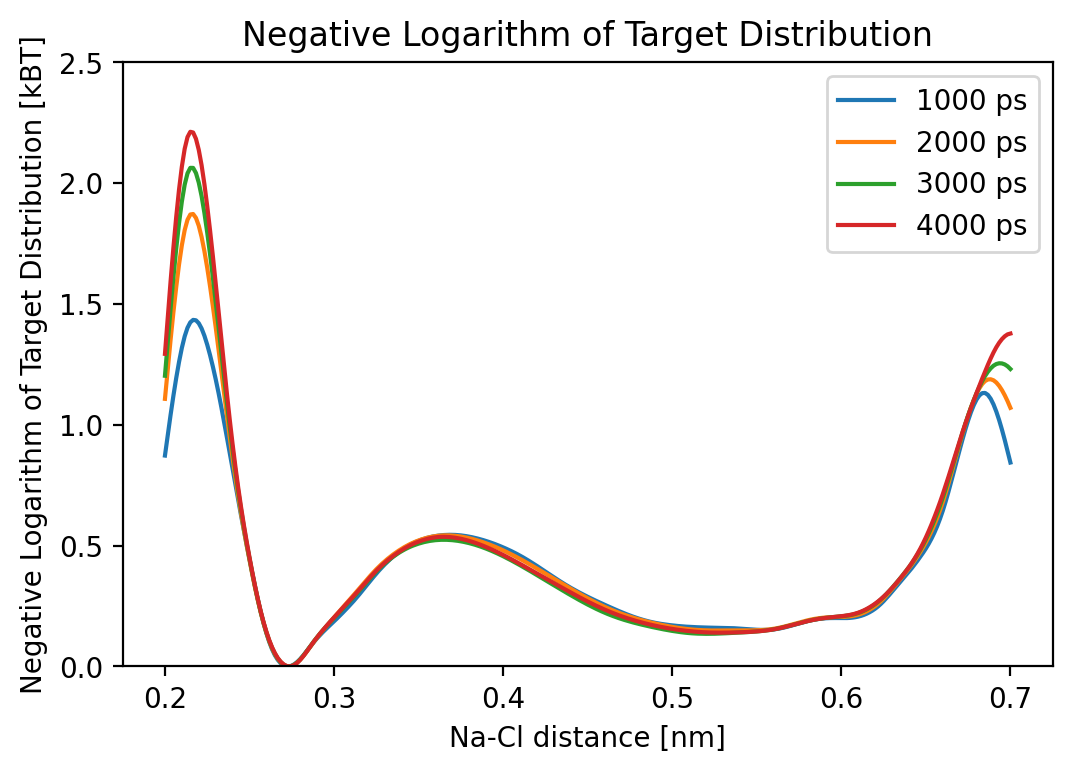

In [19]:
# Each iteration is 1 ps
for iter in range(1000,4001,1000):
    bias_data = np.loadtxt("./Exercise-1/targetdist.ves.log.iter-{0}.data".format(iter))
    plt.plot(bias_data[:,0],bias_data[:,1],label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Negative Logarithm of Target Distribution [kBT]")
    plt.legend()
    plt.title("Negative Logarithm of Target Distribution")
    plt.ylim([0,2.5])

The negative logarithm of the target distribution is the effective that we are sampling on. As we are using a well-tempered target distribution with a bias factor of 10, this should be an effective FES where the barriers have been reduced by a factor of 10. As we can see in the FES figure above, the barrier is around 5 kBT, while in this figure the effective barriers are around 0.5 kBT so this matches.

## Exercise 2 - Reweighthing

### Behaviour of bias potential and weights
First we should look at the time series of the bias potential and corresponding weights to check how much we should trim from the beginning of the colvar file

Text(0, 0.5, 'Bias [kJ/mol]')

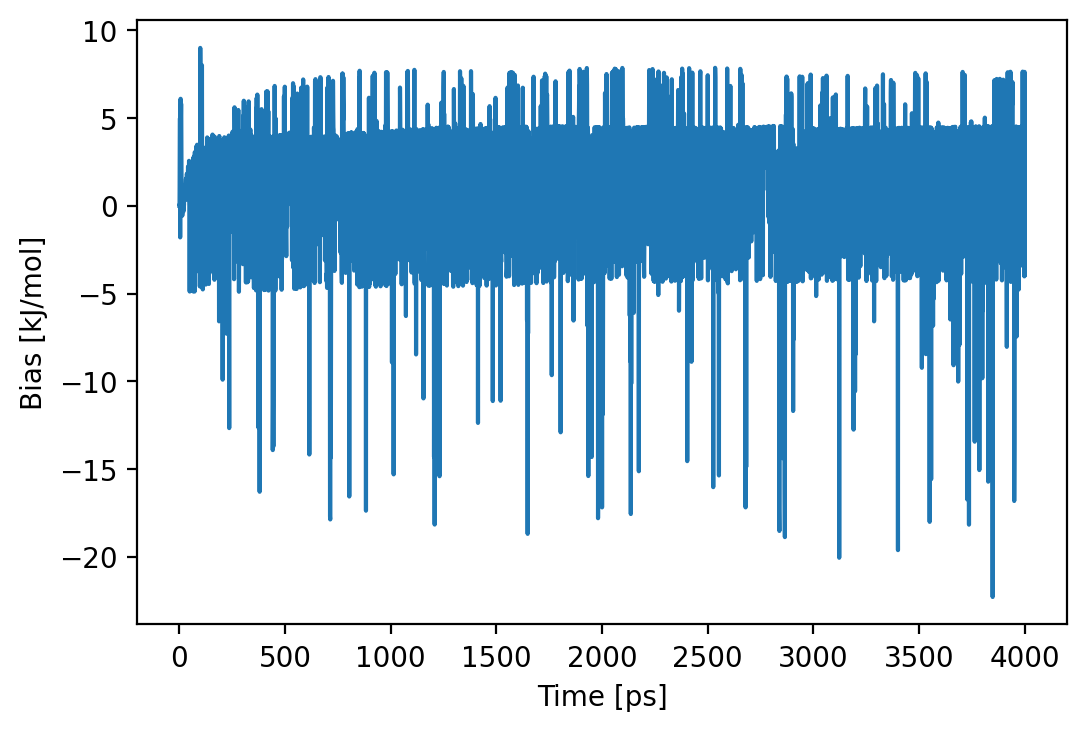

In [21]:
colvar_data = np.loadtxt("./Exercise-1/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
bias = colvar_data[:,3]
# the colvar file is outputted every 0.25 ps, only plot every 1.0 ps
plt.plot(time[::4],bias[::4],'-')
plt.xlabel("Time [ps]")
plt.ylabel("Bias [kJ/mol]")

Text(0, 0.5, 'Weight')

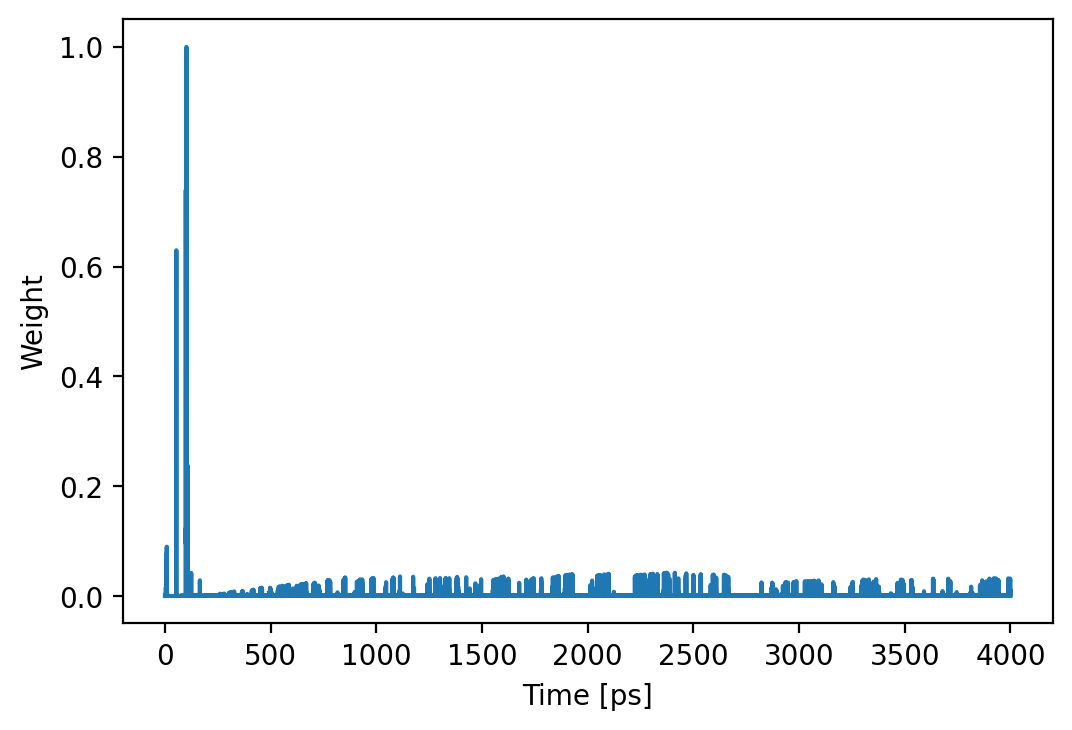

In [22]:
weight = np.exp(bias-np.max(bias))
plt.plot(time[::1],weight[::1],'-')
plt.xlabel("Time [ps]")
plt.ylabel("Weight")

Text(0, 0.5, 'Weight')

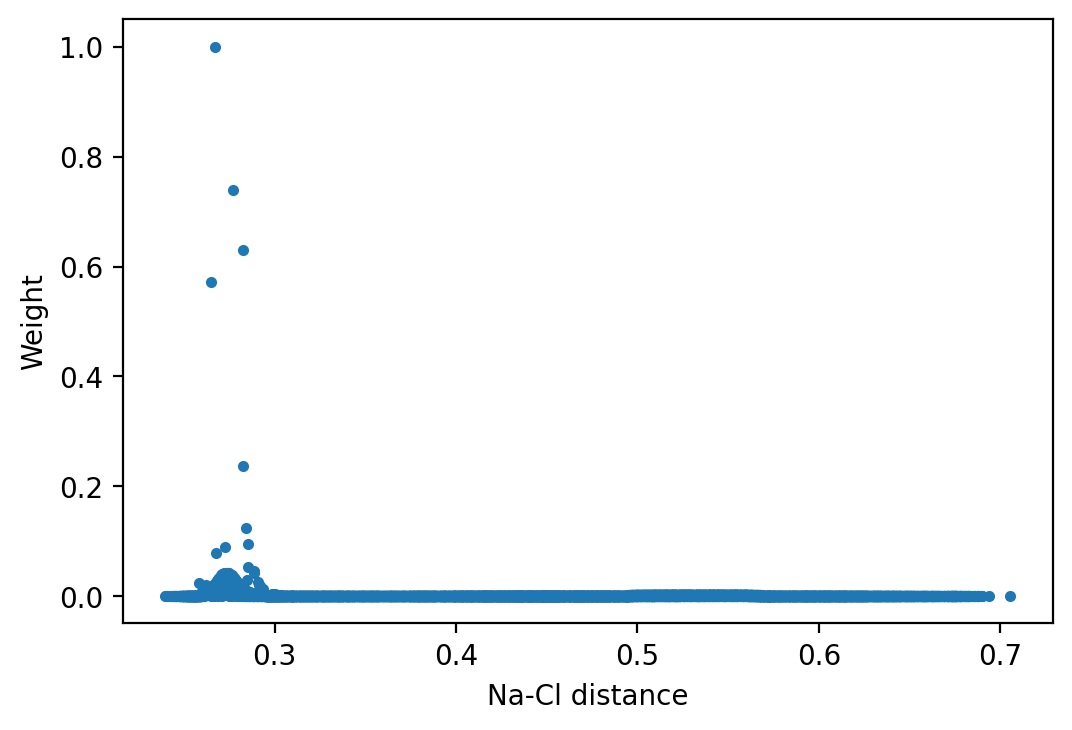

In [23]:
plt.plot(distance[::1],weight[::1],'.')
plt.xlabel("Na-Cl distance")
plt.ylabel("Weight")

Based on this, we should trim the first 500-1000 ps from the colvar file

### Reweighthing on Na-Cl distance

In [24]:
%%bash
cat ./Exercise-2/plumed_reweight.dat

# vim:ft=plumed

dist:   READ FILE=colvar_reweight.data IGNORE_TIME VALUES=dist
coord:  READ FILE=colvar_reweight.data IGNORE_TIME VALUES=coord
ves:    READ FILE=colvar_reweight.data IGNORE_TIME VALUES=ves.bias

weights: REWEIGHT_BIAS TEMP=300 ARG=ves.bias

HISTOGRAM ...
  ARG=dist
  GRID_MIN=0.2
  GRID_MAX=0.9
  GRID_BIN=60
  KERNEL=DISCRETE
  LOGWEIGHTS=weights
  LABEL=hg_dist
... HISTOGRAM

fes_dist: CONVERT_TO_FES GRID=hg_dist TEMP=300 MINTOZERO
DUMPGRID GRID=fes_dist FILE=fes-reweight.dist.data FMT=%24.16e


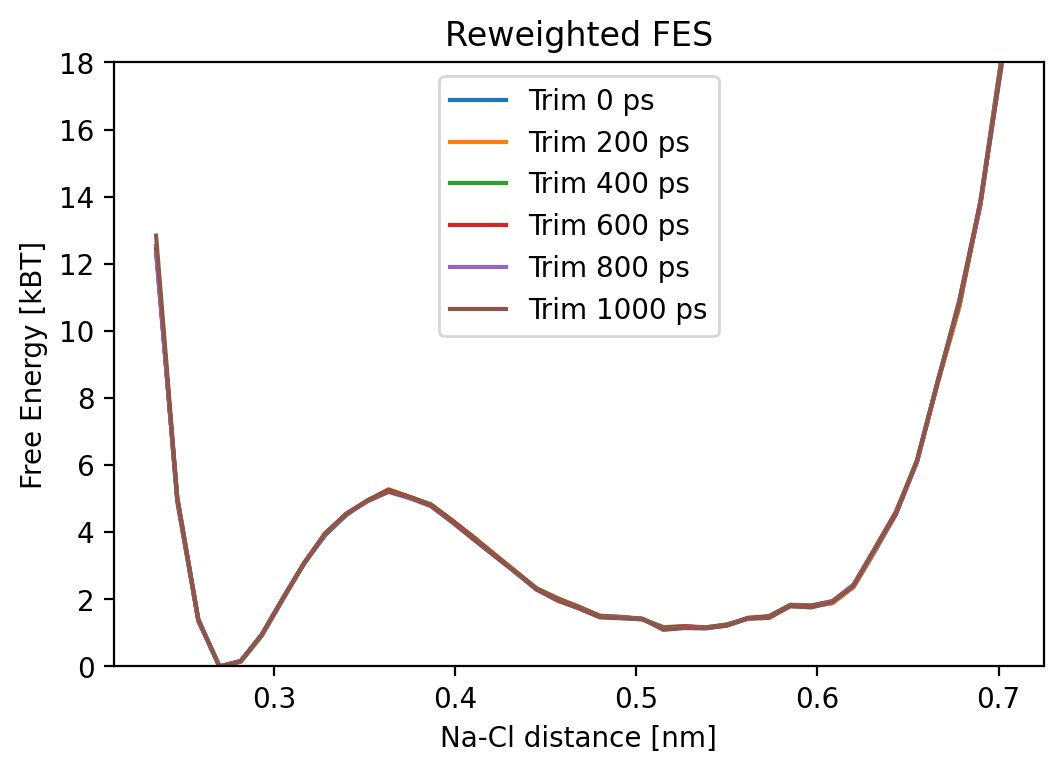

In [25]:
os.chdir(home_dir)
os.chdir("./Exercise-2")
for i in range(0,1001,200):
    os.system("./trim-colvar-file.py --colvar-file ../Exercise-1/colvar.data --output-file colvar_reweight.data --time-min {0} &> /dev/null ".format(i))
    os.system("plumed driver --plumed plumed_reweight.dat --noatoms &> /dev/null ")
    fes_data=np.loadtxt("fes-reweight.dist.data")
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Trim {} ps".format(i))
    plt.xlabel("Na-Cl distance [nm]")  
    plt.ylabel("Free Energy [kBT]")
    plt.title("Reweighted FES")
    plt.legend()
    os.system("rm -f fes-reweight.dist.data")
    os.system("rm -f colvar_reweight.data")
    plt.ylim([0,18])
os.chdir(home_dir)


In [26]:
os.chdir(home_dir)
os.chdir("./Exercise-2")
os.system("rm -f bck*.fes-reweight.dist.data")
os.system("rm -f fes-reweight.dist.data")
trim_time="500"
os.system("./trim-colvar-file.py --colvar-file ../Exercise-1/colvar.data --output-file colvar_reweight.data --time-min {0} &> /dev/null ".format(trim_time))
os.system("plumed driver --plumed plumed_reweight.dat --noatoms &> /dev/null ")
os.chdir(home_dir)


### Comparing FES directly from bias potential and from reweighting

(0.0, 15.0)

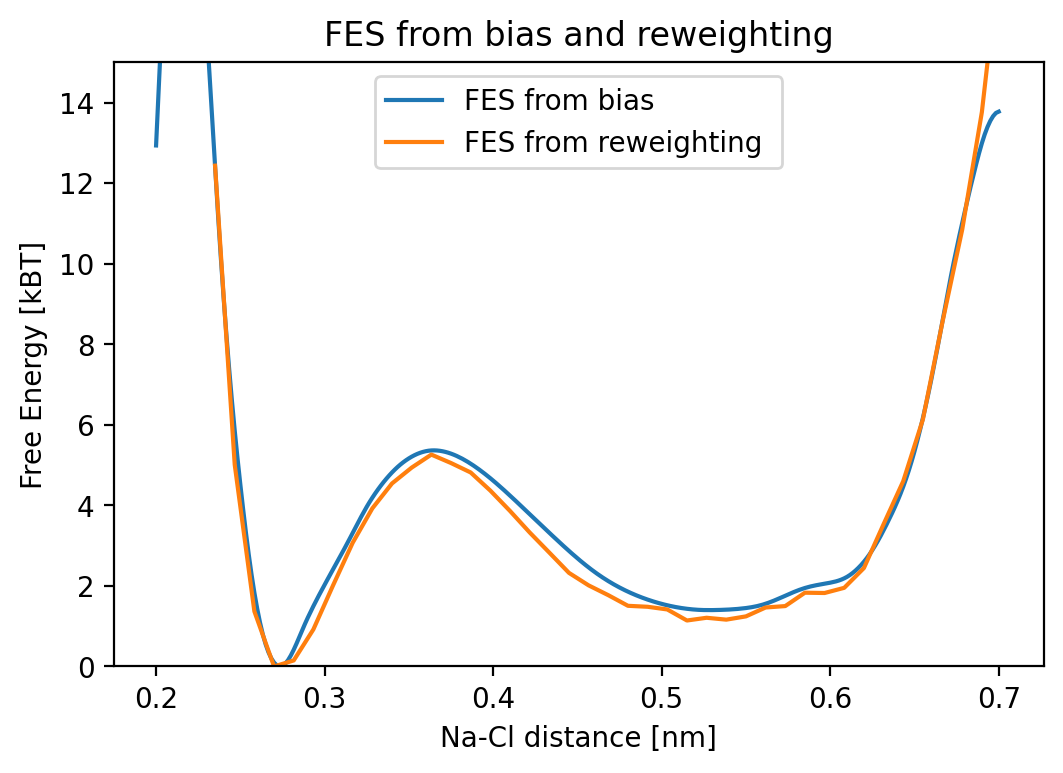

In [27]:
last_iter=4000
fes_data = np.loadtxt("./Exercise-1/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="FES from bias")

fes_rew_data = np.loadtxt("./Exercise-2/fes-reweight.dist.data")
plt.plot(fes_rew_data[:,0],fes_rew_data[:,1]/kBT,label="FES from reweighting ")

plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Free Energy [kBT]")
plt.legend()
plt.title("FES from bias and reweighting")
plt.ylim([0,15])

### Smoothing using kernel density estimation

In [28]:
%%bash
cd Exercise-2/
cat << EOF > plumed_reweight.kde.dat 
# vim:ft=plumed

dist:   READ FILE=colvar_reweight.data IGNORE_TIME VALUES=dist
coord:  READ FILE=colvar_reweight.data IGNORE_TIME VALUES=coord
ves:    READ FILE=colvar_reweight.data IGNORE_TIME VALUES=ves.bias

weights: REWEIGHT_BIAS TEMP=300 ARG=ves.bias

HISTOGRAM ...
  ARG=dist
  GRID_MIN=0.2
  GRID_MAX=0.9
  GRID_BIN=200
  BANDWIDTH=0.004
  LOGWEIGHTS=weights
  LABEL=hg_dist
... HISTOGRAM

fes_dist: CONVERT_TO_FES GRID=hg_dist TEMP=300 MINTOZERO
DUMPGRID GRID=fes_dist FILE=fes-reweight.kde.dist.data FMT=%24.16e
EOF

plumed driver --plumed plumed_reweight.kde.dat --noatoms &> /dev/null
rm -f bck.*.fes-reweight.kde.dist.data
ls 

cd ..

colvar_reweight.data
fes-reweight.dist-coord.data
fes-reweight.dist.data
fes-reweight.kde.dist.data
plumed_reweight.2D.dat
plumed_reweight.dat
plumed_reweight.kde.dat
trim-colvar-file.py


(0.0, 15.0)

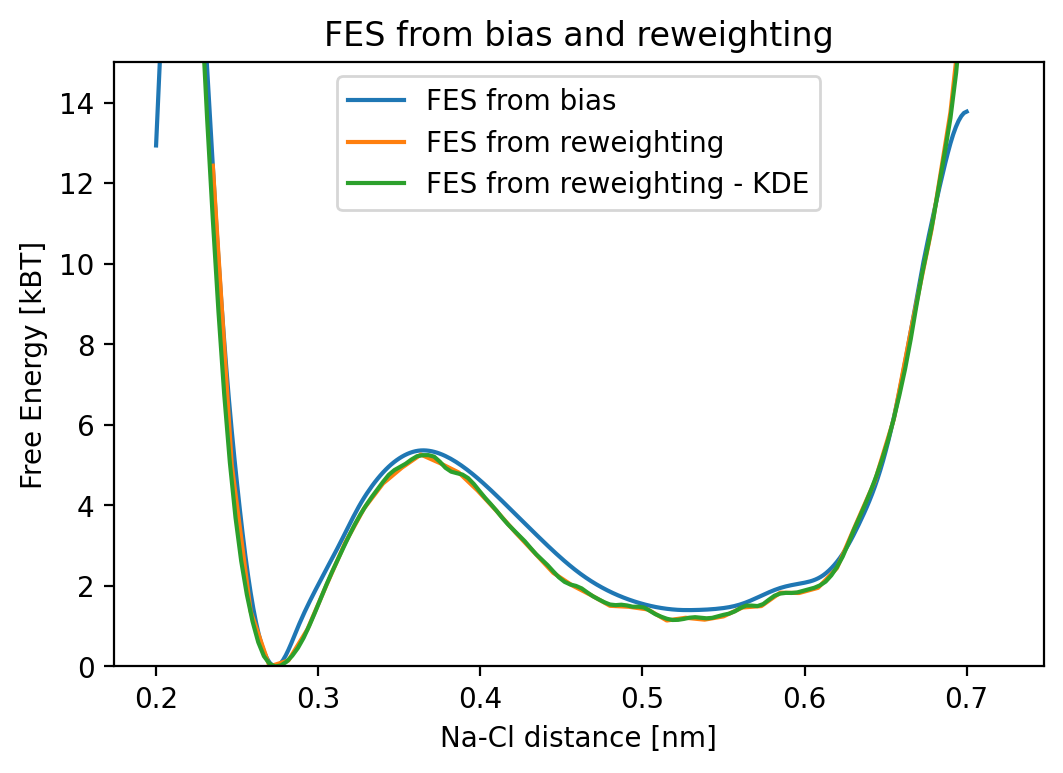

In [29]:
last_iter=4000
fes_data = np.loadtxt("./Exercise-1/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="FES from bias")

fes_rew_data = np.loadtxt("./Exercise-2/fes-reweight.dist.data")
plt.plot(fes_rew_data[:,0],fes_rew_data[:,1]/kBT,label="FES from reweighting ")

fes_rew_kde_data = np.loadtxt("./Exercise-2/fes-reweight.kde.dist.data")
plt.plot(fes_rew_kde_data[:,0],fes_rew_kde_data[:,1]/kBT,label="FES from reweighting - KDE")

plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Free Energy [kBT]")
plt.legend()
plt.title("FES from bias and reweighting")
plt.ylim([0,15])

### Reweighthing on Na-Cl distance and solvation CV

In [30]:
%%bash
cd Exercise-2/
cat << EOF > plumed_reweight.2D.dat 
# vim:ft=plumed

dist:   READ FILE=colvar_reweight.data IGNORE_TIME VALUES=dist
coord:  READ FILE=colvar_reweight.data IGNORE_TIME VALUES=coord
ves:    READ FILE=colvar_reweight.data IGNORE_TIME VALUES=ves.bias

weights: REWEIGHT_BIAS TEMP=300 ARG=ves.bias

HISTOGRAM ...
  ARG=dist,coord
  GRID_MIN=0.2,2.5
  GRID_MAX=0.9,7.5
  GRID_BIN=200,200
  BANDWIDTH=0.004,0.04
  LOGWEIGHTS=weights
  LABEL=hg_dist_coord
... HISTOGRAM

fes_dist_coord: CONVERT_TO_FES GRID=hg_dist_coord TEMP=300 MINTOZERO
DUMPGRID GRID=fes_dist_coord FILE=fes-reweight.dist-coord.data FMT=%24.16e
EOF

plumed driver --plumed plumed_reweight.2D.dat --noatoms &> /dev/null
rm -f bck.*.fes-reweight.dist-coord.data
ls 

cd ..

colvar_reweight.data
fes-reweight.dist-coord.data
fes-reweight.dist.data
fes-reweight.kde.dist.data
plumed_reweight.2D.dat
plumed_reweight.dat
plumed_reweight.kde.dat
trim-colvar-file.py


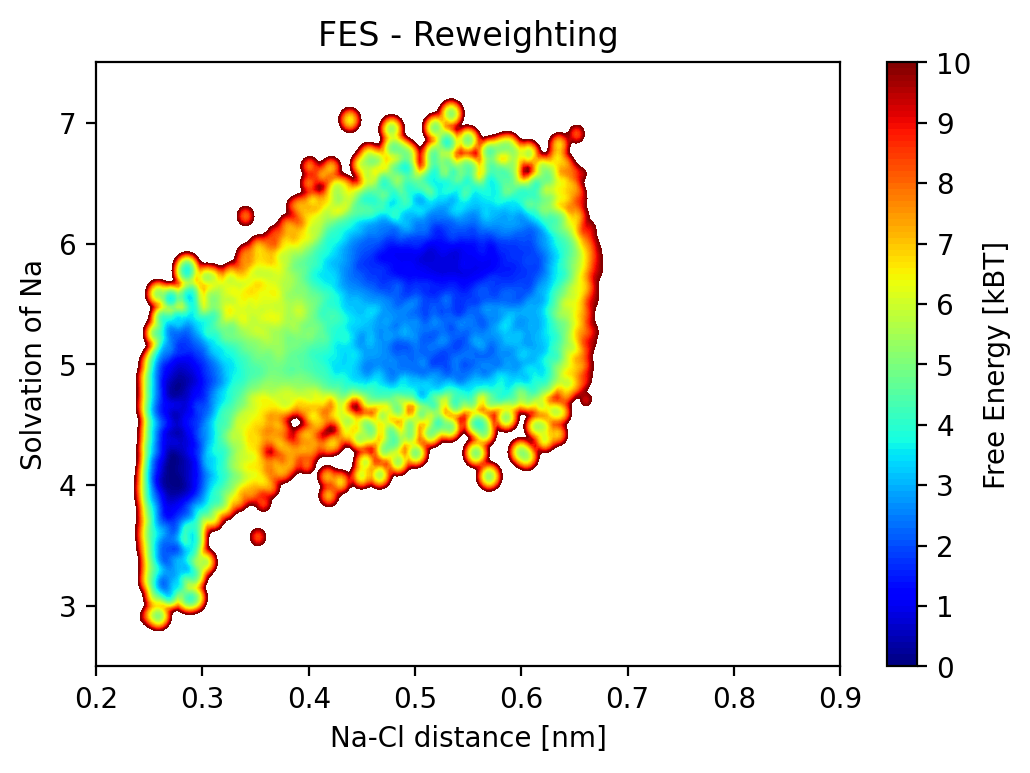

In [31]:
fes_data = np.loadtxt("./Exercise-2/fes-reweight.dist-coord.data")
distance = fes_data[:,0].reshape(201,201)
coord =    fes_data[:,1].reshape(201,201)
fes_2d =   fes_data[:,2].reshape(201,201)
from matplotlib import cm
plt.contourf(distance,coord,fes_2d/kBT, levels=np.linspace(0,10,101), cmap=cm.jet)
plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Solvation of Na")
plt.title("FES - Reweighting")
plt.colorbar(label="Free Energy [kBT]", ticks=range(0,11))

## Exercise 3 - Another independent simulation (biasing the distance)


(0.2, 0.7)

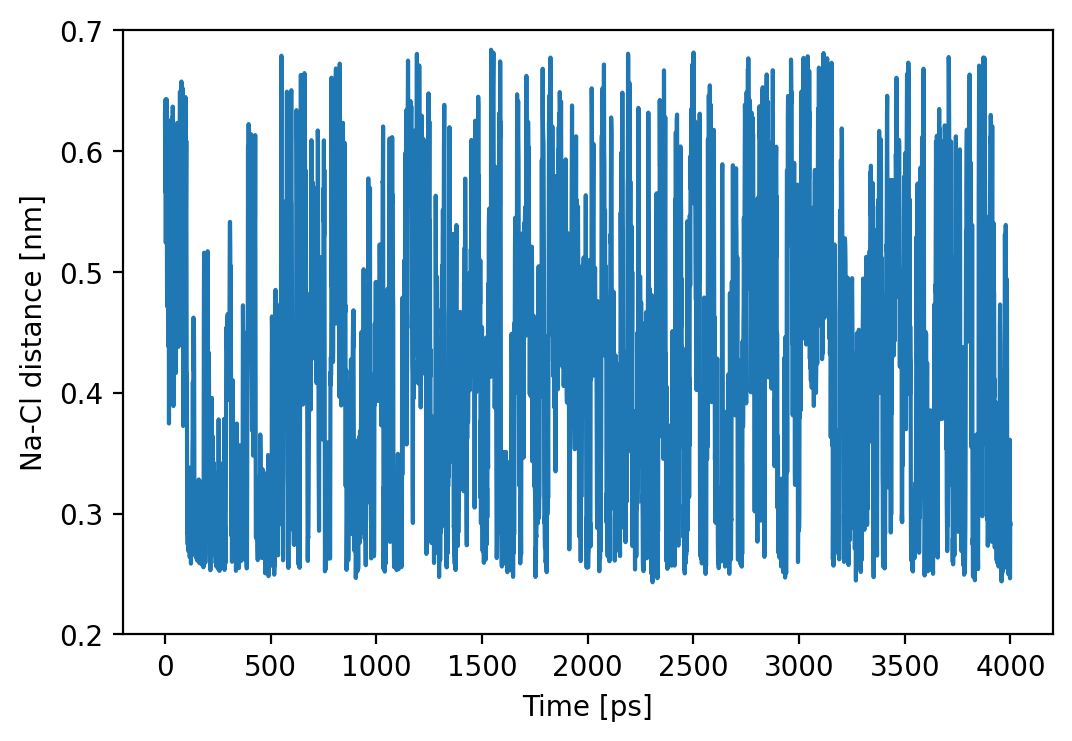

In [32]:
colvar_data = np.loadtxt("./Exercise-3/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
# the colvar file is outputted every 0.25 ps, only plot every 1.0 ps
plt.plot(time[::4],distance[::4],'-')
plt.xlabel("Time [ps]")
plt.ylabel("Na-Cl distance [nm]")
plt.ylim([0.2,0.7])

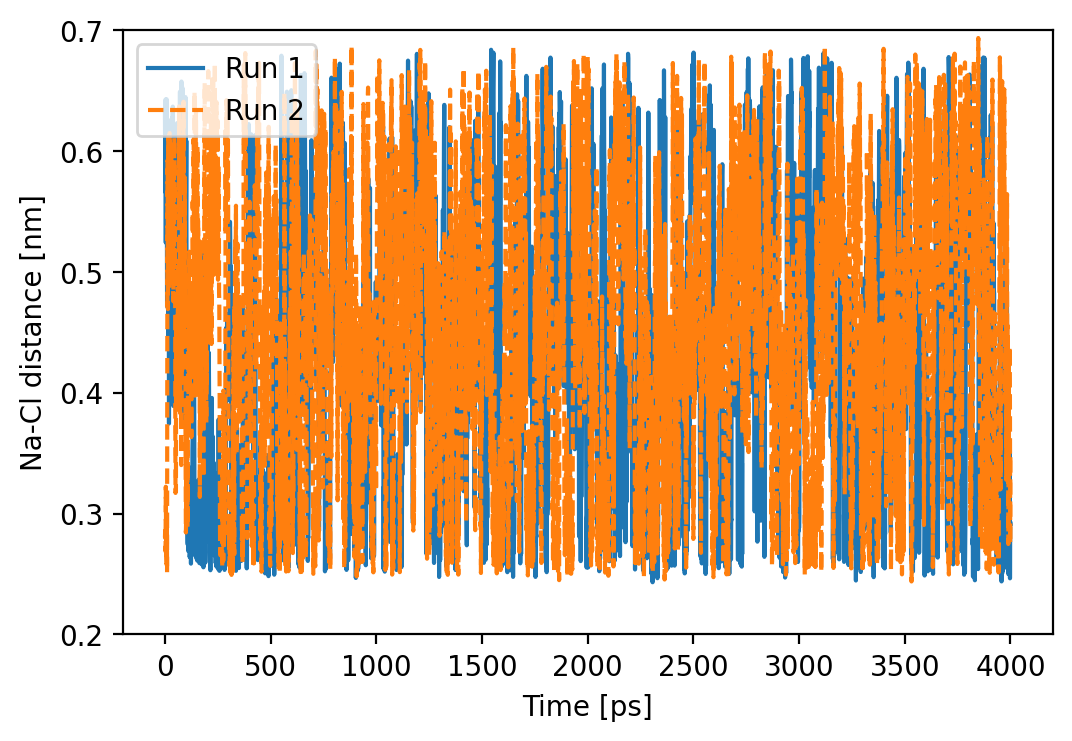

In [33]:
colvar_data = np.loadtxt("./Exercise-3/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
# the colvar file is outputted every 0.25 ps, only plot every 1.0 ps
plt.plot(time[::4],distance[::4],'-',label="Run 1")
plt.xlabel("Time [ps]")
plt.ylabel("Na-Cl distance [nm]")
plt.ylim([0.2,0.7])

colvar_data = np.loadtxt("./Exercise-1/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
plt.plot(time[::4],distance[::4],'--',label="Run 2")
plt.legend()

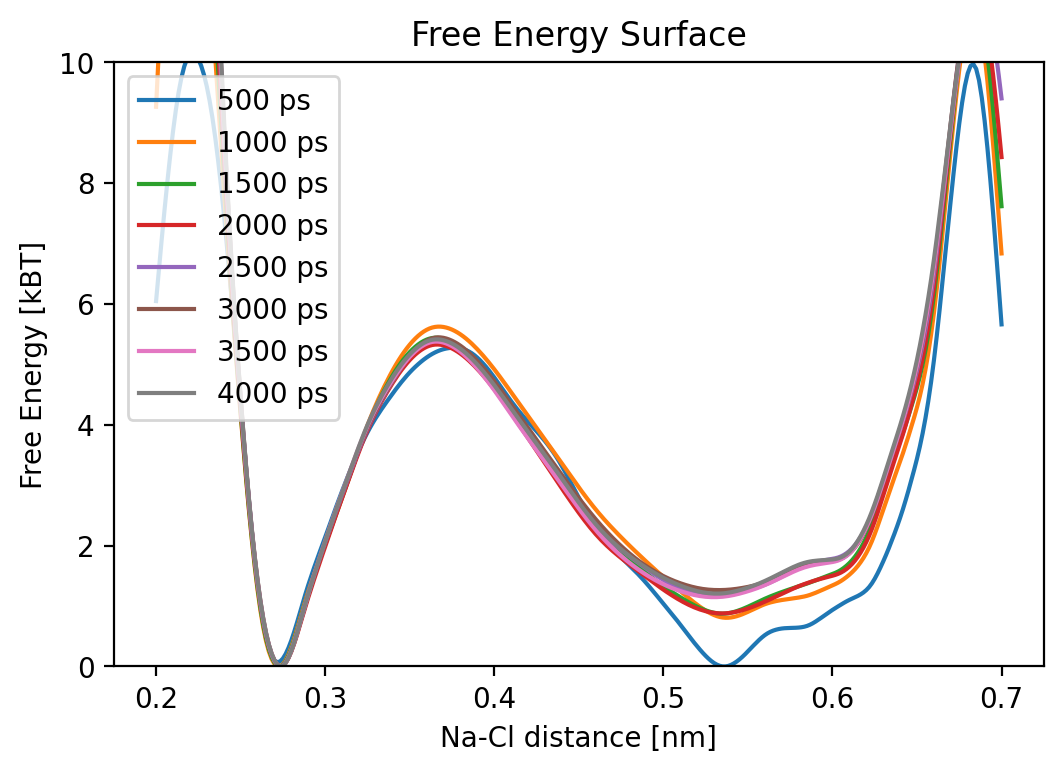

In [34]:
# Each iteration is 1 ps
for iter in range(500,4001,500):
    fes_data = np.loadtxt("./Exercise-3/fes.ves.iter-{0}.data".format(iter))
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Free Energy [kBT]")
    plt.legend()
    plt.title("Free Energy Surface")
    plt.ylim([0,10])

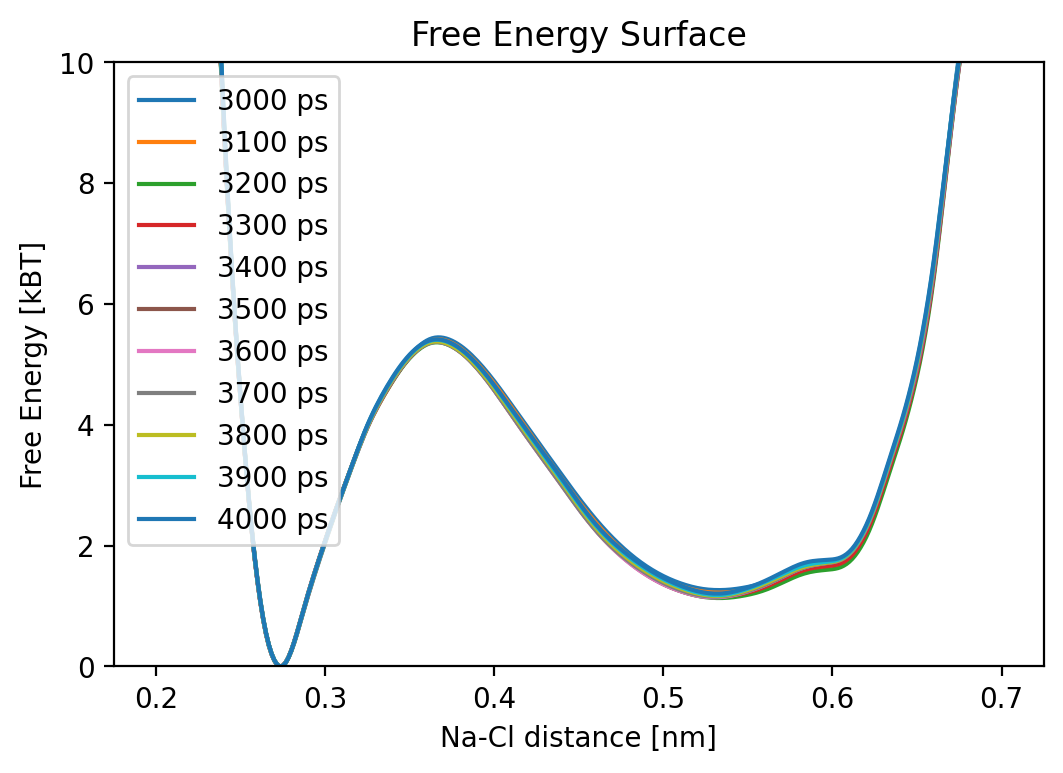

In [35]:
# Each iteration is 1 ps
for iter in range(3000,4001,100):
    fes_data = np.loadtxt("./Exercise-3/fes.ves.iter-{0}.data".format(iter))
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Free Energy [kBT]")
    plt.legend()
    plt.title("Free Energy Surface")
    plt.ylim([0,10])

(0.0, 15.0)

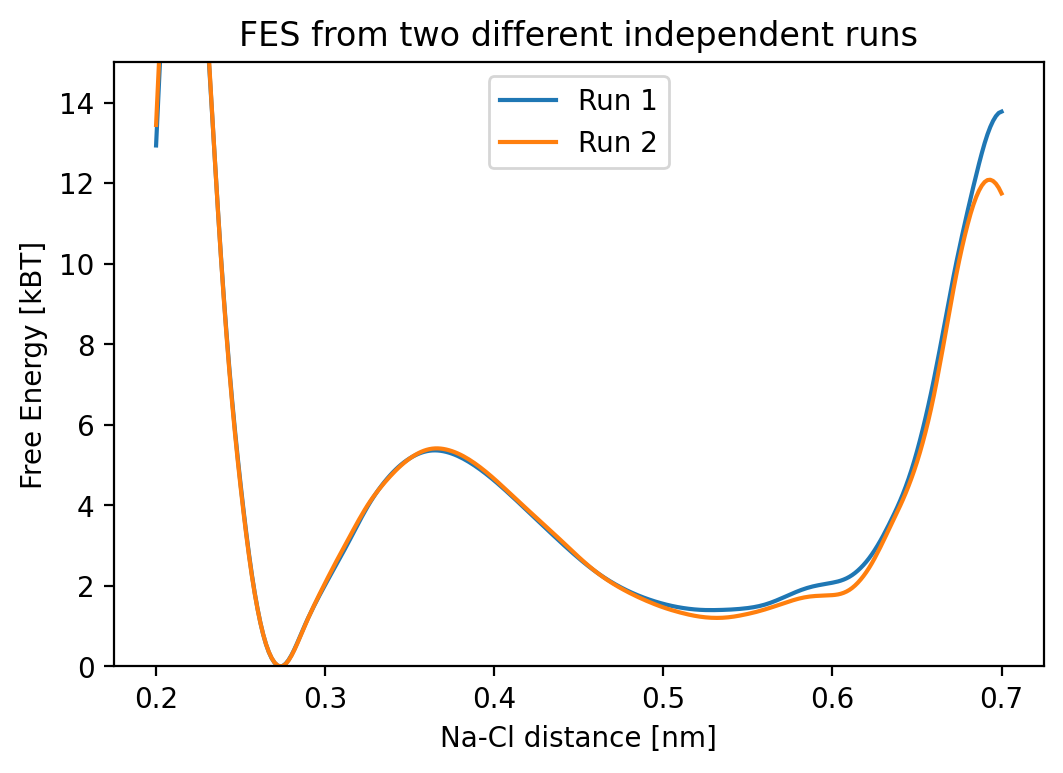

In [36]:
last_iter=4000

fes_data = np.loadtxt("./Exercise-1/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 1")

fes_data = np.loadtxt("./Exercise-3/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 2")


plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Free Energy [kBT]")
plt.legend()
plt.title("FES from two different independent runs")
plt.ylim([0,15])

In [37]:
%%bash
cd Exercise-3/
cat << EOF > plumed_reweight.kde.dat 
# vim:ft=plumed

dist:   READ FILE=colvar_reweight.data IGNORE_TIME VALUES=dist
coord:  READ FILE=colvar_reweight.data IGNORE_TIME VALUES=coord
ves:    READ FILE=colvar_reweight.data IGNORE_TIME VALUES=ves.bias

weights: REWEIGHT_BIAS TEMP=300 ARG=ves.bias

HISTOGRAM ...
  ARG=dist
  GRID_MIN=0.2
  GRID_MAX=0.9
  GRID_BIN=200
  BANDWIDTH=0.004
  LOGWEIGHTS=weights
  LABEL=hg_dist
... HISTOGRAM

fes_dist: CONVERT_TO_FES GRID=hg_dist TEMP=300 MINTOZERO
DUMPGRID GRID=fes_dist FILE=fes-reweight.kde.dist.data FMT=%24.16e
EOF

trim_time=500 
../Exercise-2/trim-colvar-file.py --colvar-file ./colvar.data --output-file colvar_reweight.data --time-min ${trim_time} &> /dev/null

plumed driver --plumed plumed_reweight.kde.dat --noatoms &> /dev/null
rm -f bck.*.fes-reweight.kde.dist.data


cd ..

(0.0, 15.0)

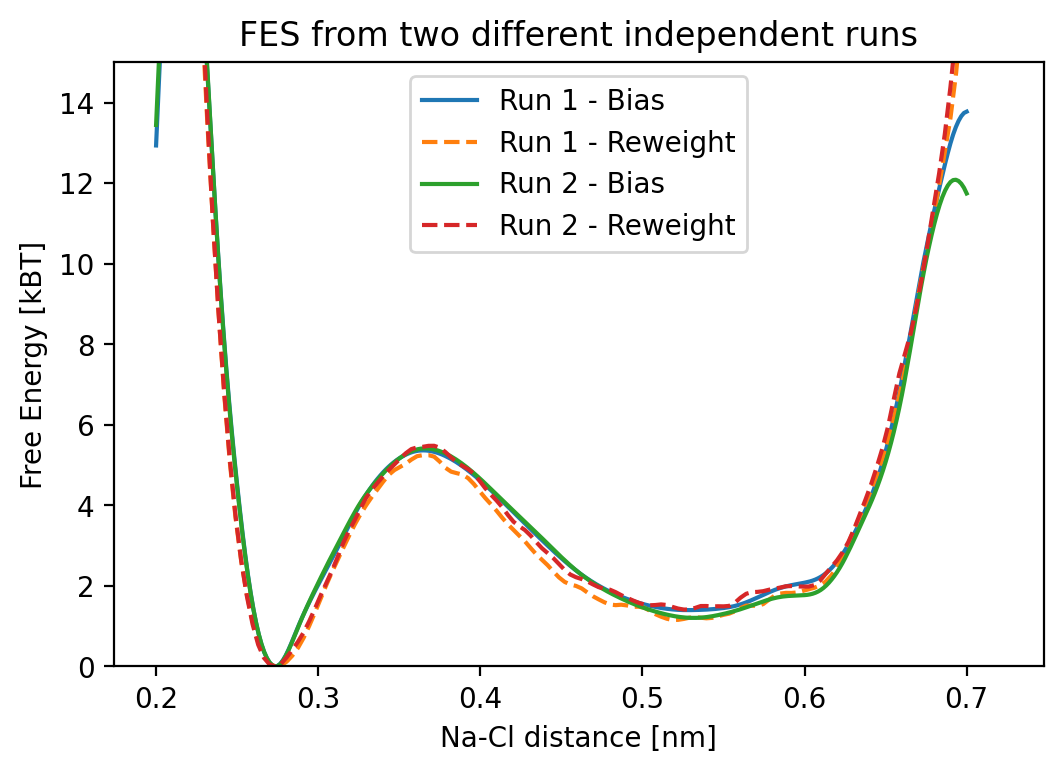

In [38]:
last_iter=4000


fes_data = np.loadtxt("./Exercise-1/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 1 - Bias")

fes_data = np.loadtxt("./Exercise-2/fes-reweight.kde.dist.data")
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 1 - Reweight",linestyle='--')

fes_data = np.loadtxt("./Exercise-3/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 2 - Bias")

fes_data = np.loadtxt("./Exercise-3/fes-reweight.kde.dist.data")
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 2 - Reweight",linestyle='--')

plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Free Energy [kBT]")
plt.legend()
plt.title("FES from two different independent runs")
plt.ylim([0,15])

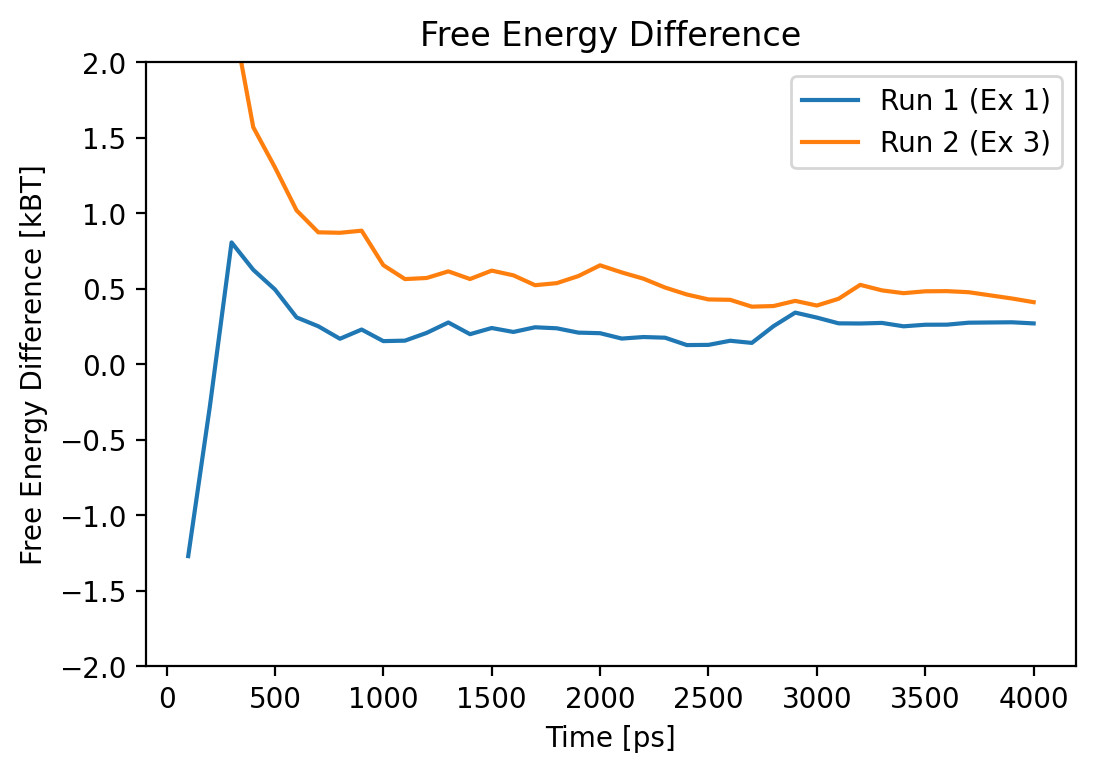

In [39]:
iteration_ex3=[]
free_energy_difference_ex3=[]

for iter in range(100,4001,100):
    iteration_ex3.append(iter)
    fes_filename="./Exercise-3/fes.ves.iter-{0}.data".format(iter)
    fe_diff = calc_free_energy_difference(fes_filename)
    free_energy_difference_ex3.append(fe_diff)

plt.plot(iteration_ex1,free_energy_difference_ex1,label="Run 1 (Ex 1)")
plt.plot(iteration_ex3,free_energy_difference_ex3,label="Run 2 (Ex 3)")
plt.xlabel("Time [ps]")
plt.ylabel("Free Energy Difference [kBT]")
plt.title("Free Energy Difference")
plt.ylim([-2.0,2.0])
plt.legend()

## Exercise 4 - Biasing with two CVs

(0.2, 0.7)

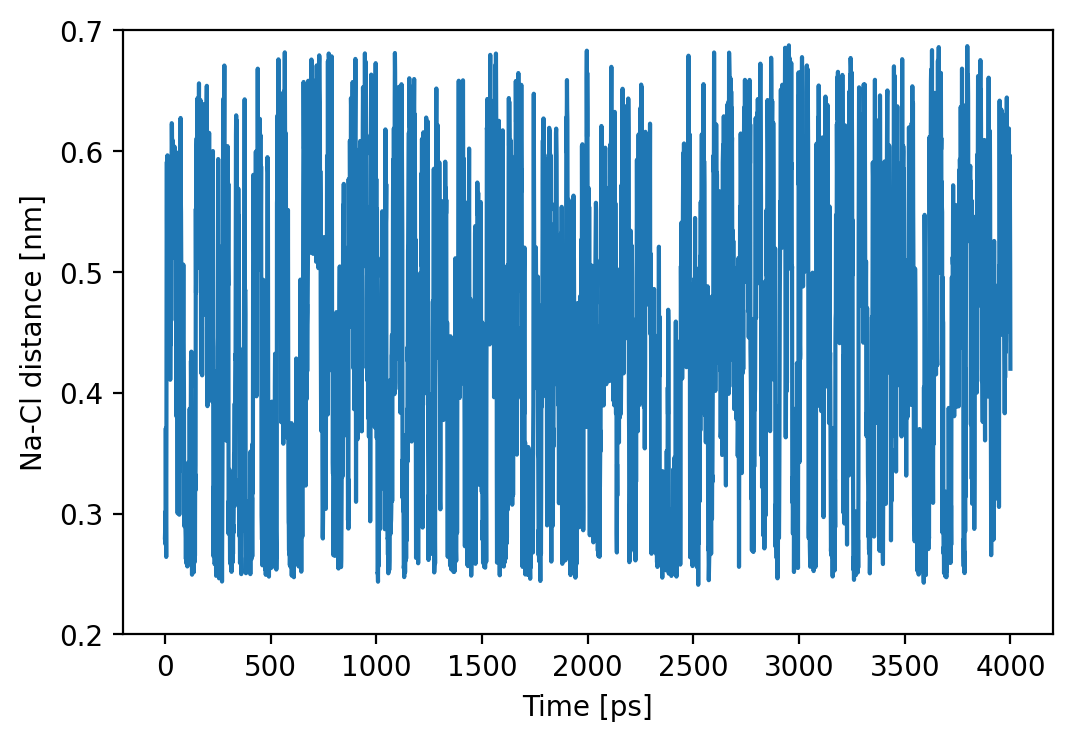

In [40]:
colvar_data = np.loadtxt("./Exercise-4/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
# the colvar file is outputted every 0.25 ps, only plot every 1.0 ps
plt.plot(time[::4],distance[::4],'-')
plt.xlabel("Time [ps]")
plt.ylabel("Na-Cl distance [nm]")
plt.ylim([0.2,0.7])

Text(0, 0.5, 'solvation of Na')

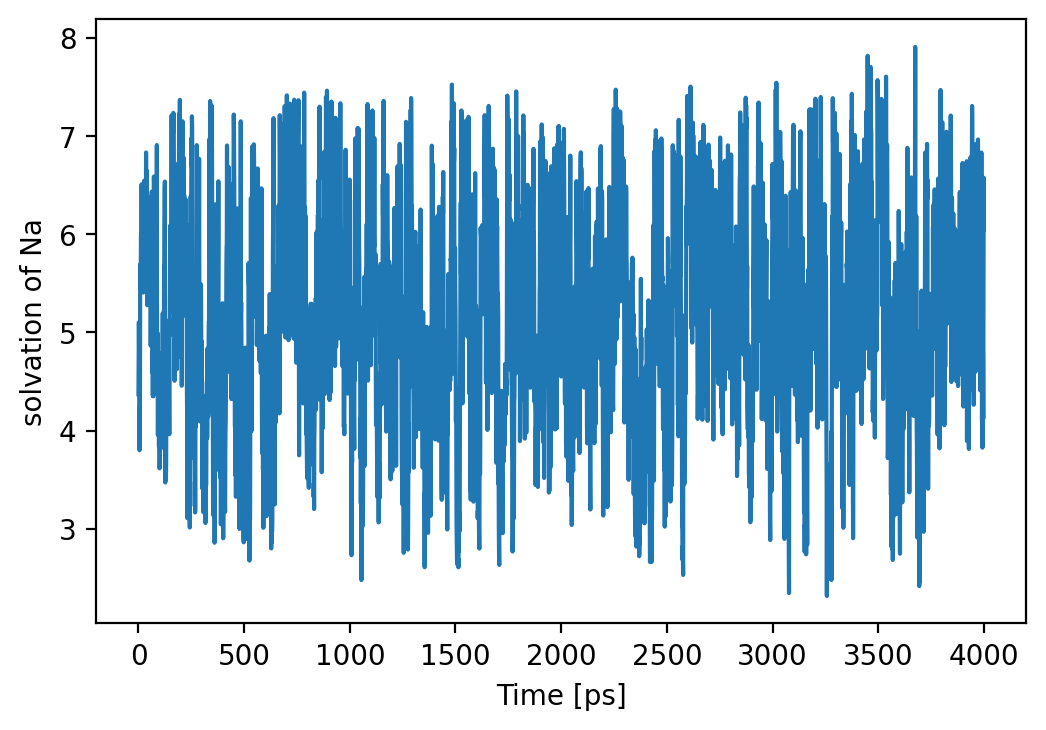

In [41]:
plt.plot(time[::4],coord[::4],'-')
plt.xlabel("Time [ps]")
plt.ylabel("solvation of Na")

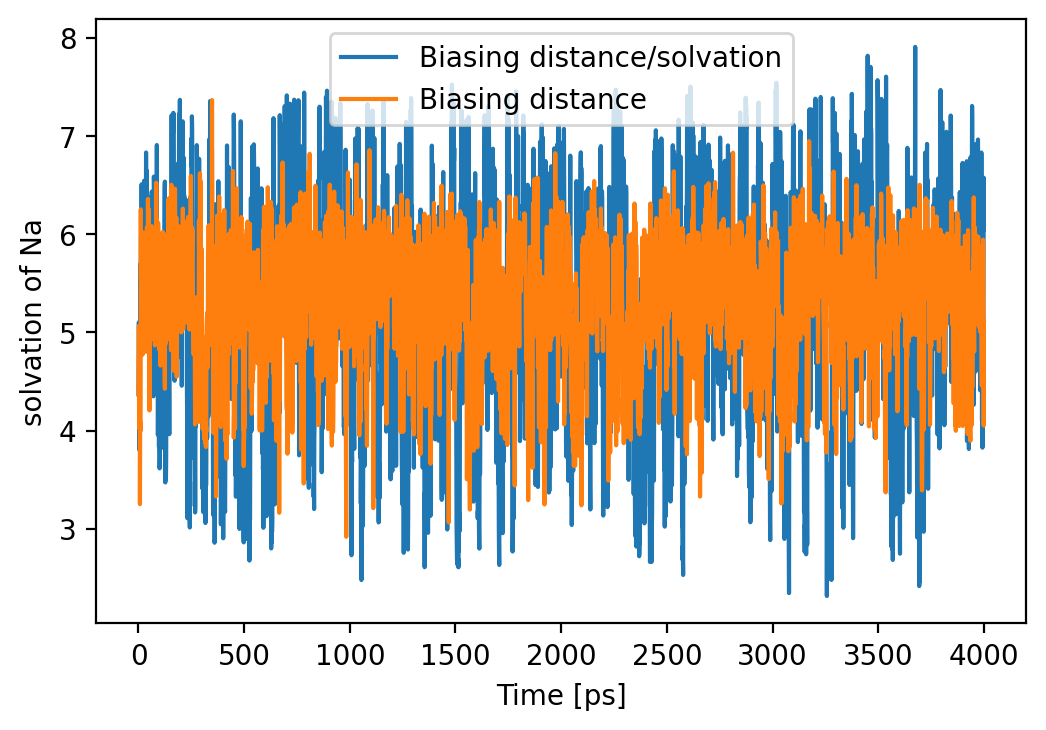

In [42]:
colvar_data = np.loadtxt("./Exercise-4/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
plt.plot(time[::4],coord[::4],'-',label="Biasing distance/solvation")

colvar_data = np.loadtxt("./Exercise-1/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
plt.plot(time[::4],coord[::4],'-',label="Biasing distance")

plt.xlabel("Time [ps]")
plt.ylabel("solvation of Na")
plt.legend()


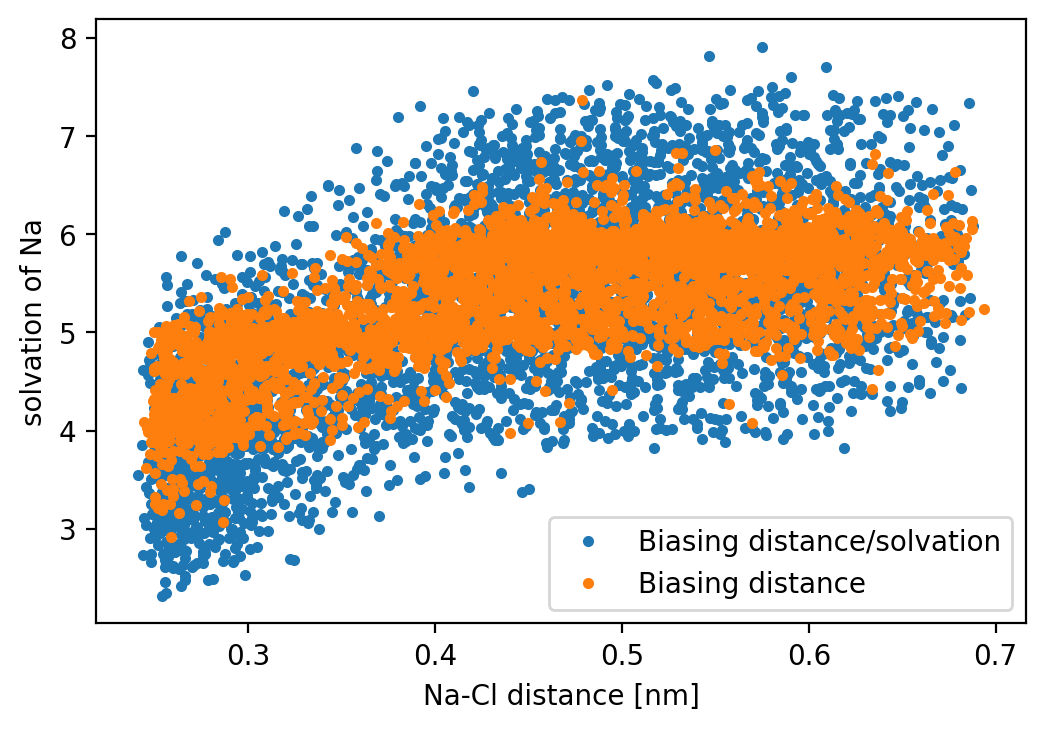

In [43]:
colvar_data = np.loadtxt("./Exercise-4/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
plt.plot(distance[::4],coord[::4],'.',label="Biasing distance/solvation")

colvar_data = np.loadtxt("./Exercise-1/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
plt.plot(distance[::4],coord[::4],'.',label="Biasing distance")

plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("solvation of Na")
plt.legend()

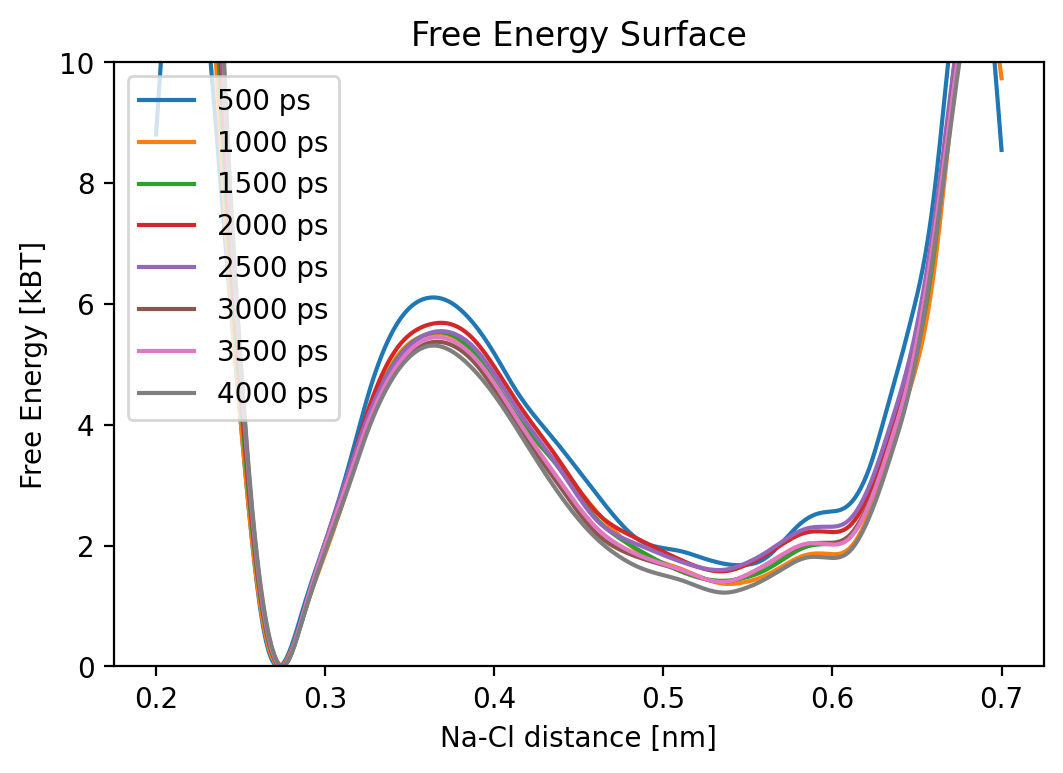

In [44]:
# Each iteration is 1 ps
for iter in range(500,4001,500):
    fes_data = np.loadtxt("./Exercise-4/fes.ves.proj-1.iter-{0}.data".format(iter))
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Free Energy [kBT]")
    plt.legend()
    plt.title("Free Energy Surface")
    plt.ylim([0,10])

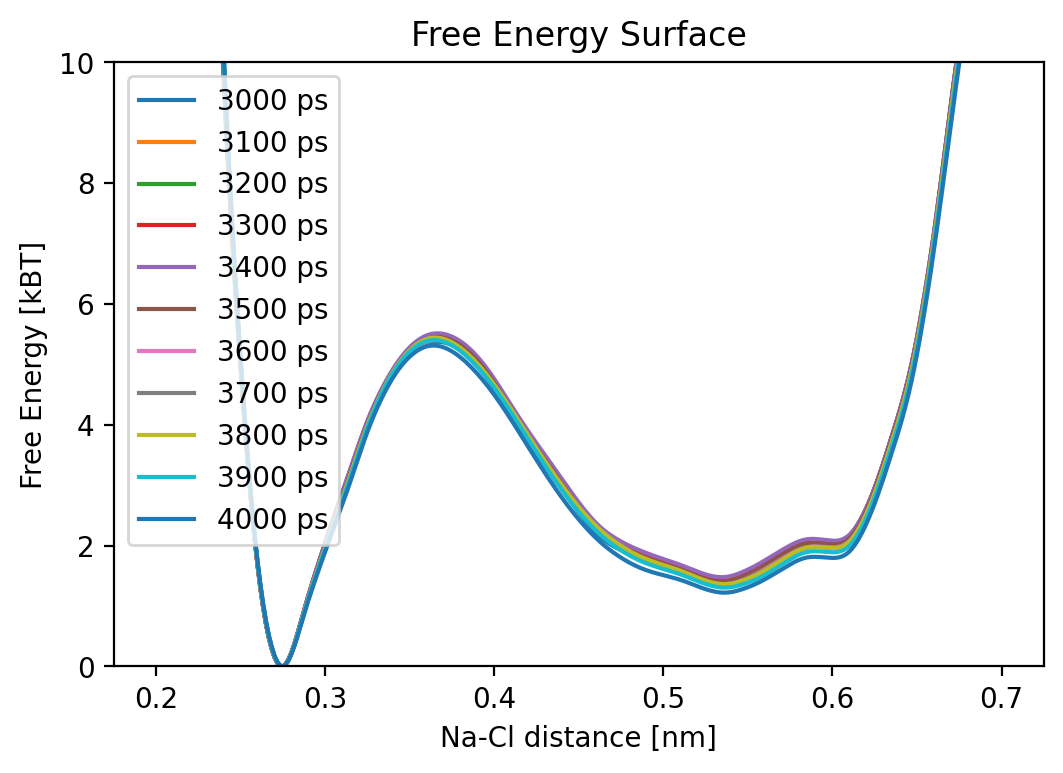

In [45]:
# Each iteration is 1 ps
for iter in range(3000,4001,100):
    fes_data = np.loadtxt("./Exercise-4/fes.ves.proj-1.iter-{0}.data".format(iter))
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Free Energy [kBT]")
    plt.legend()
    plt.title("Free Energy Surface")
    plt.ylim([0,10])

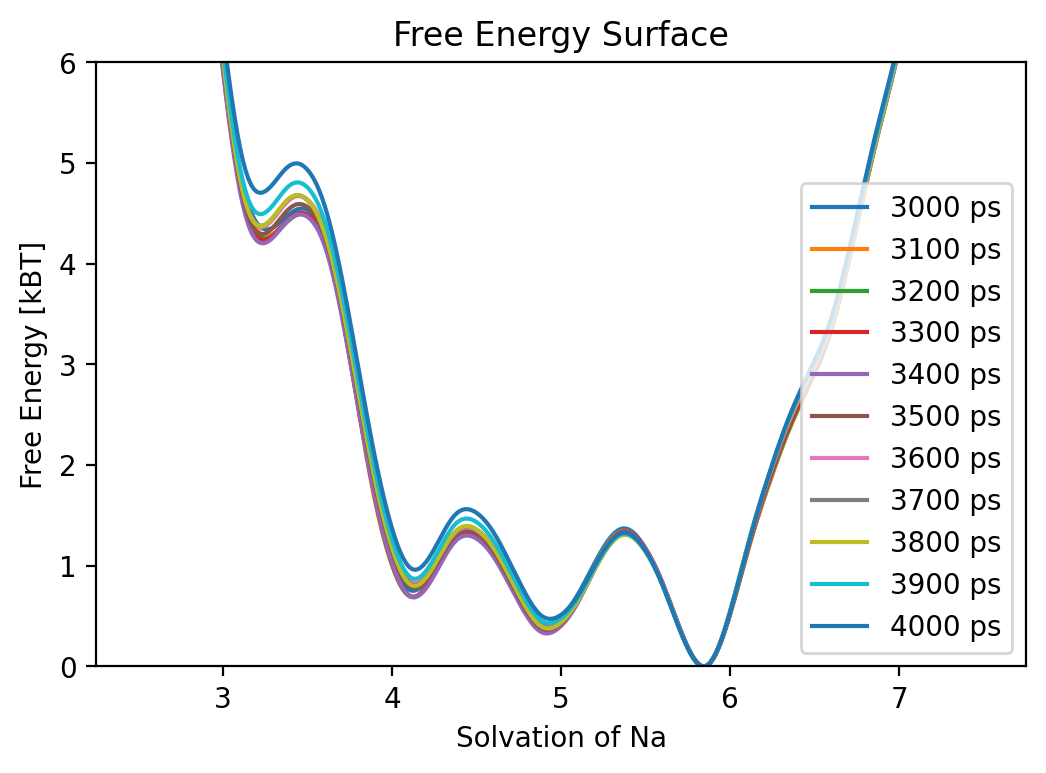

In [46]:
# Each iteration is 1 ps
for iter in range(3000,4001,100):
    fes_data = np.loadtxt("./Exercise-4/fes.ves.proj-2.iter-{0}.data".format(iter))
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Solvation of Na")
    plt.ylabel("Free Energy [kBT]")
    plt.legend()
    plt.title("Free Energy Surface")
    plt.ylim([0,6])

(0.0, 10.0)

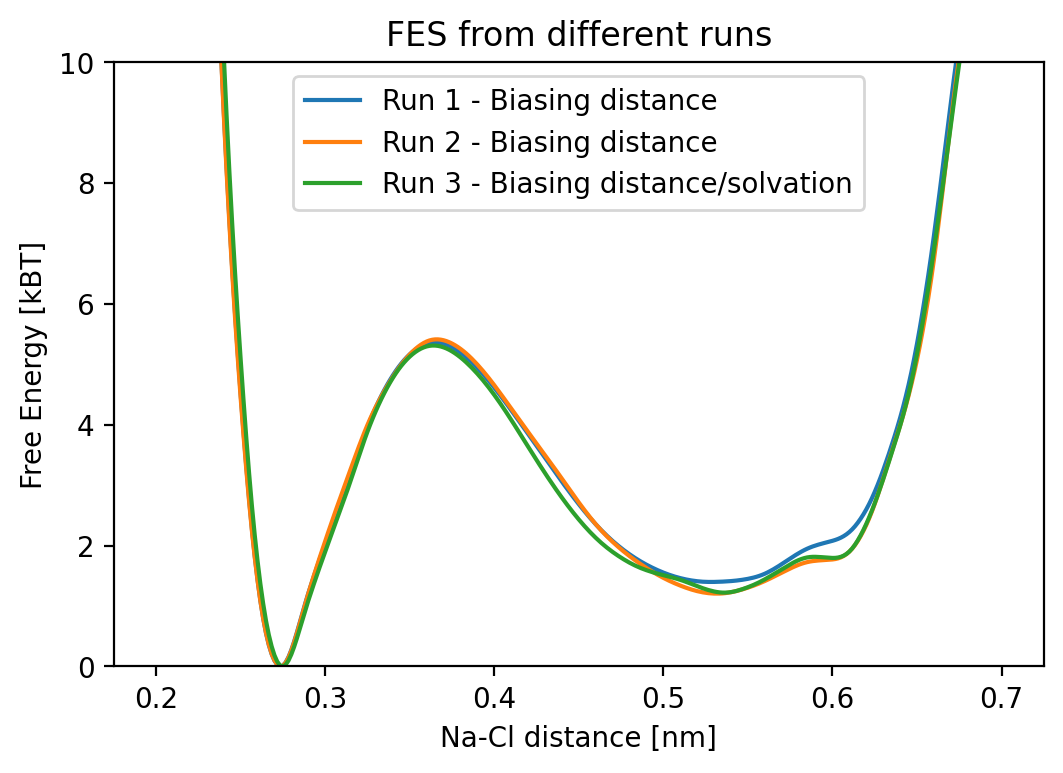

In [47]:
last_iter=4000

fes_data = np.loadtxt("./Exercise-1/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 1 - Biasing distance")

fes_data = np.loadtxt("./Exercise-3/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 2 - Biasing distance")

fes_data = np.loadtxt("./Exercise-4/fes.ves.proj-1.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 3 - Biasing distance/solvation")


plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Free Energy [kBT]")
plt.legend()
plt.title("FES from different runs")
plt.ylim([0,10])

In [48]:
%%bash
cd Exercise-4/
cat << EOF > plumed_reweight.kde.dat 
# vim:ft=plumed

dist:   READ FILE=colvar_reweight.data IGNORE_TIME VALUES=dist
coord:  READ FILE=colvar_reweight.data IGNORE_TIME VALUES=coord
ves:    READ FILE=colvar_reweight.data IGNORE_TIME VALUES=ves.bias

weights: REWEIGHT_BIAS TEMP=300 ARG=ves.bias

HISTOGRAM ...
  ARG=dist
  GRID_MIN=0.2
  GRID_MAX=0.9
  GRID_BIN=200
  BANDWIDTH=0.004
  LOGWEIGHTS=weights
  LABEL=hg_dist
... HISTOGRAM

fes_dist: CONVERT_TO_FES GRID=hg_dist TEMP=300 MINTOZERO
DUMPGRID GRID=fes_dist FILE=fes-reweight.kde.dist.data FMT=%24.16e
EOF

trim_time=500 
../Exercise-2/trim-colvar-file.py --colvar-file ./colvar.data --output-file colvar_reweight.data --time-min ${trim_time} &> /dev/null

plumed driver --plumed plumed_reweight.kde.dat --noatoms &> /dev/null
rm -f bck.*.fes-reweight.kde.dist.data


cd ..

In [49]:
last_iter=4000

fes_data = np.loadtxt("./Exercise-1/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 1 - Biasing distance")

fes_data = np.loadtxt("./Exercise-2/fes-reweight.kde.dist.data")
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 1 - Reweight",linestyle='--')

fes_data = np.loadtxt("./Exercise-3/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 2 - Biasing distance")

fes_data = np.loadtxt("./Exercise-3/fes-reweight.kde.dist.data")
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 2 - Reweight",linestyle='--')

fes_data = np.loadtxt("./Exercise-4/fes.ves.proj-1.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 3 - Biasing distance/solvation")

fes_data = np.loadtxt("./Exercise-4/fes-reweight.kde.dist.data")
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 3 - Reweight",linestyle='--')

plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Free Energy [kBT]")
plt.legend()
plt.title("FES from different runs")
plt.ylim([0,10])

(0.0, 10.0)

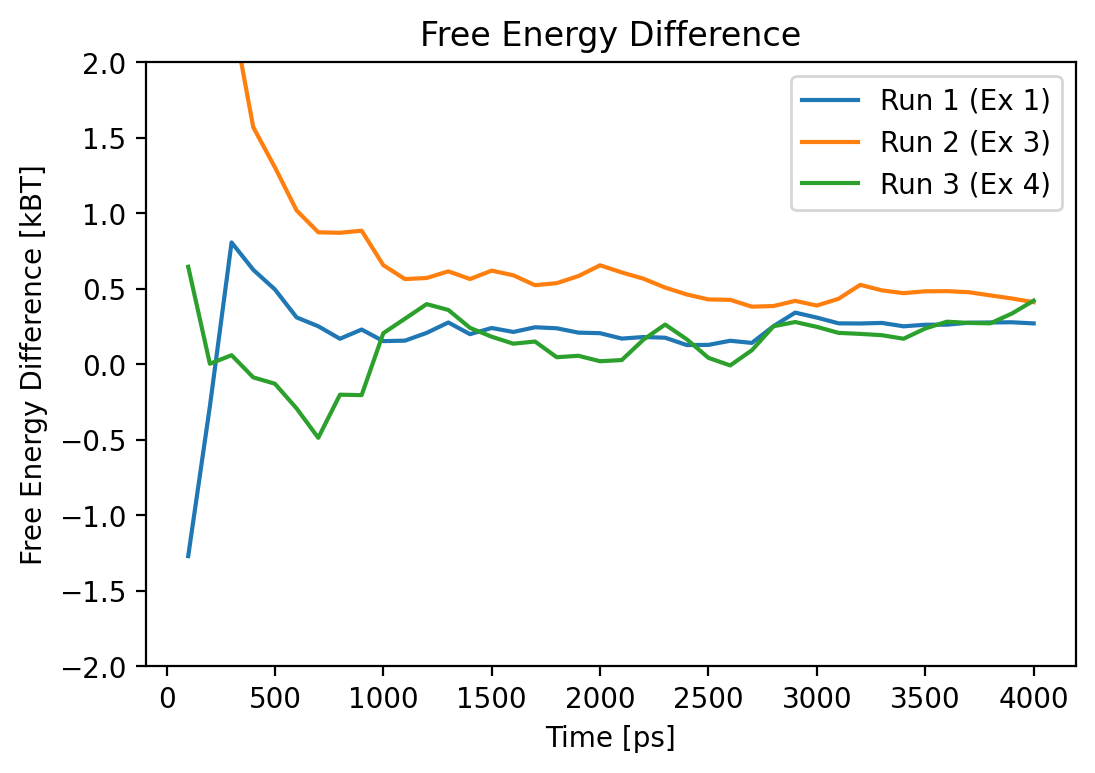

In [50]:
iteration_ex4=[]
free_energy_difference_ex4=[]

for iter in range(100,4001,100):
    iteration_ex4.append(iter)
    fes_filename="./Exercise-4/fes.ves.proj-1.iter-{0}.data".format(iter)
    fe_diff = calc_free_energy_difference(fes_filename)
    free_energy_difference_ex4.append(fe_diff)

plt.plot(iteration_ex1,free_energy_difference_ex1,label="Run 1 (Ex 1)")
plt.plot(iteration_ex3,free_energy_difference_ex3,label="Run 2 (Ex 3)")
plt.plot(iteration_ex4,free_energy_difference_ex4,label="Run 3 (Ex 4)")
plt.xlabel("Time [ps]")
plt.ylabel("Free Energy Difference [kBT]")
plt.title("Free Energy Difference")
plt.ylim([-2.0,2.0])
plt.legend()

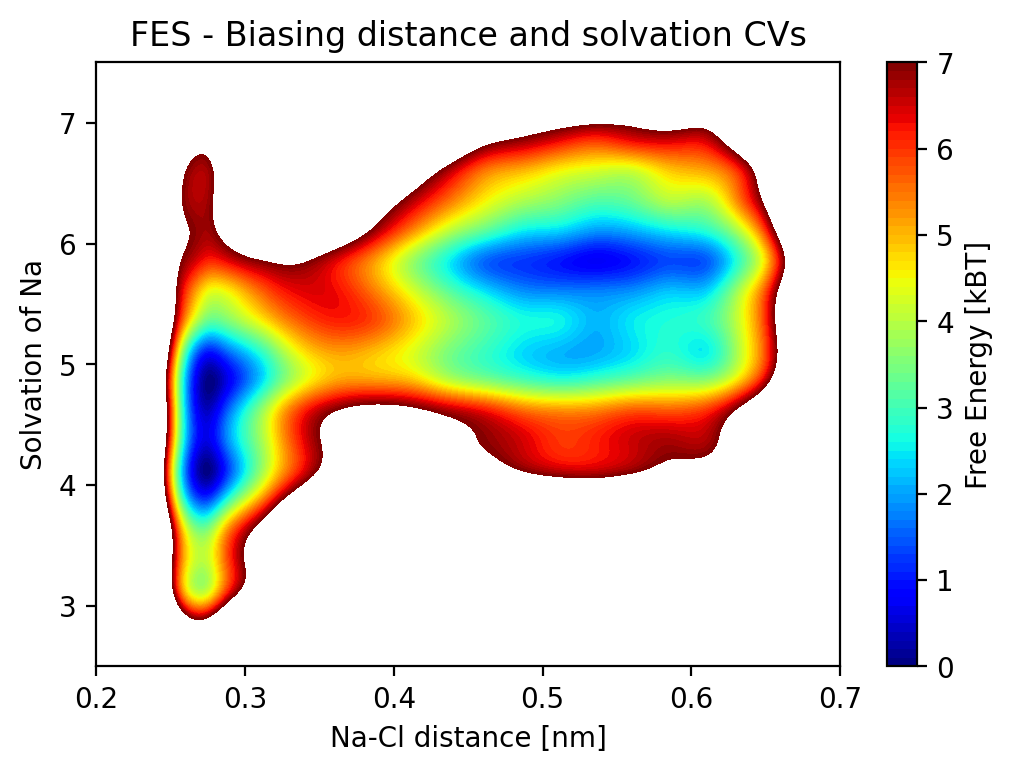

In [51]:
last_iter=4000
fes_data = np.loadtxt("./Exercise-4/fes.ves.iter-{0}.data".format(last_iter))
distance = fes_data[:,0].reshape(301,301)
coord =    fes_data[:,1].reshape(301,301)
fes_2d =   fes_data[:,2].reshape(301,301)
from matplotlib import cm
plt.contourf(distance,coord,fes_2d/kBT, levels=np.linspace(0,7,71), cmap=cm.jet)
plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Solvation of Na")
plt.title("FES - Biasing distance and solvation CVs")
plt.colorbar(label="Free Energy [kBT]", ticks=range(0,8))

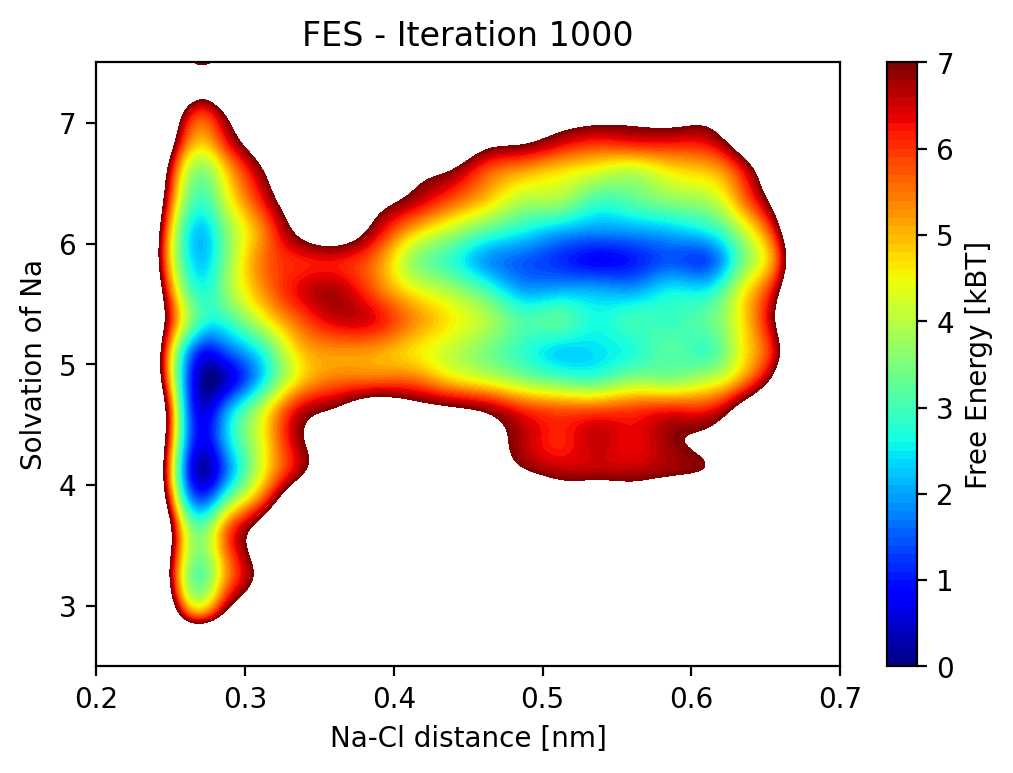

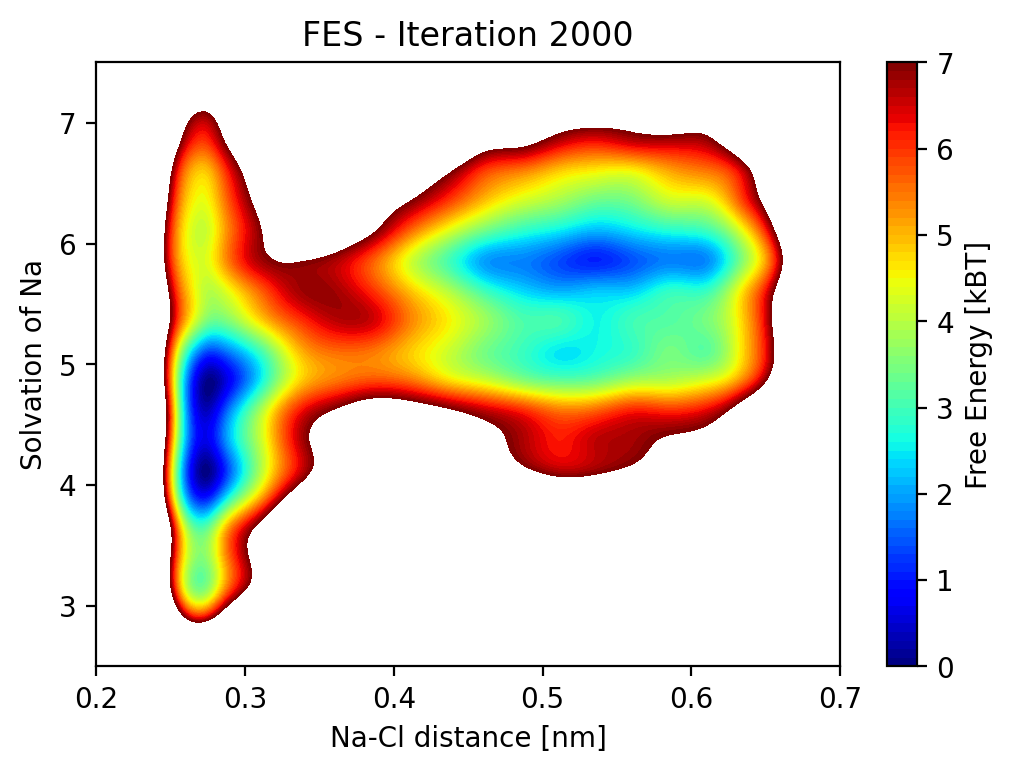

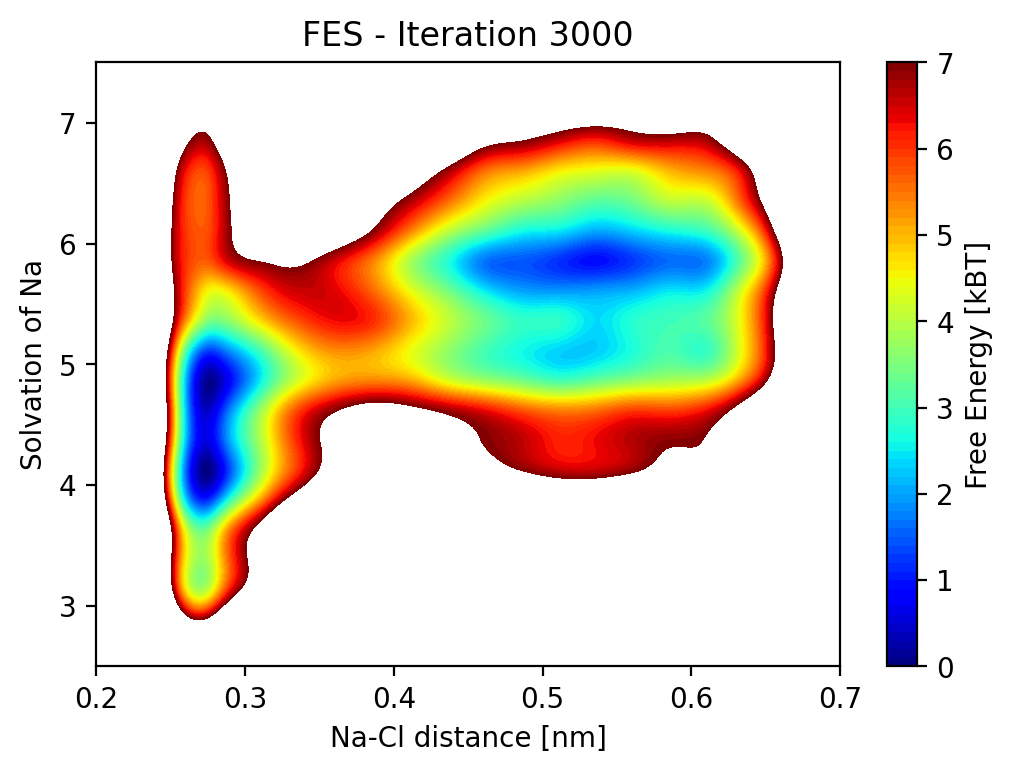

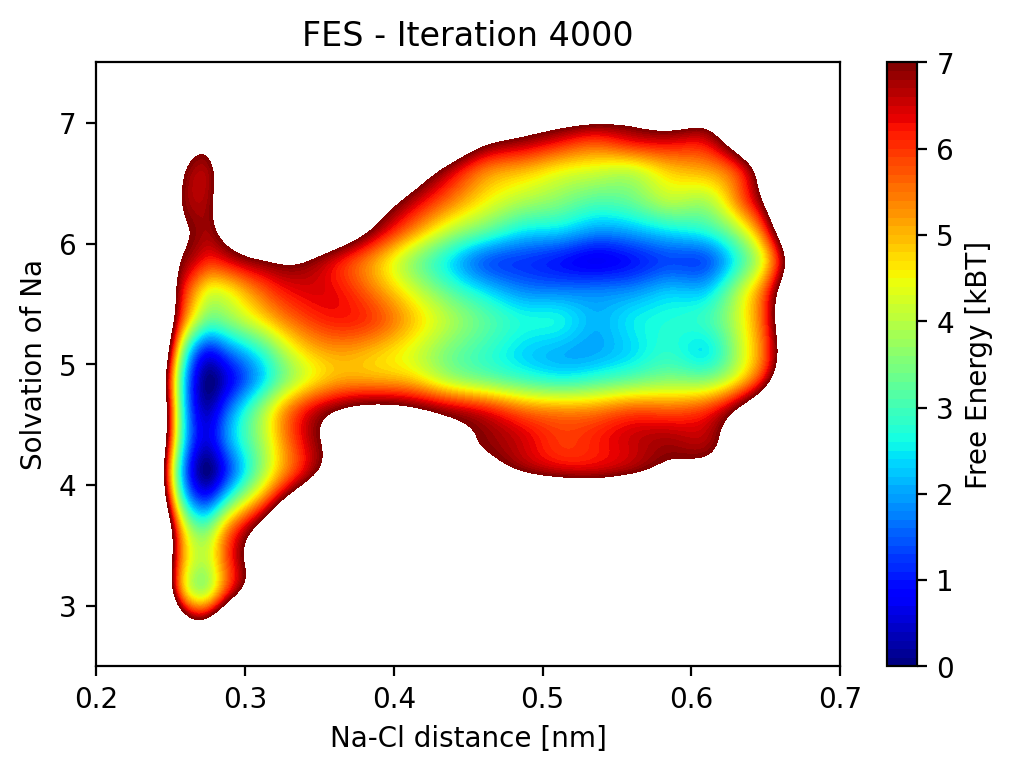

In [52]:
for iter in range(1000,4001,1000):
    fes_data = np.loadtxt("./Exercise-4/fes.ves.iter-{0}.data".format(iter))
    distance = fes_data[:,0].reshape(301,301)
    coord =    fes_data[:,1].reshape(301,301)
    fes_2d =   fes_data[:,2].reshape(301,301)
    from matplotlib import cm
    plt.contourf(distance,coord,fes_2d/kBT, levels=np.linspace(0,7,71), cmap=cm.jet)
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Solvation of Na")
    plt.title("FES - Iteration {0}".format(iter))
    plt.colorbar(label="Free Energy [kBT]", ticks=range(0,8))
    plt.show()

## Exercise 6 - Uniform target distribution

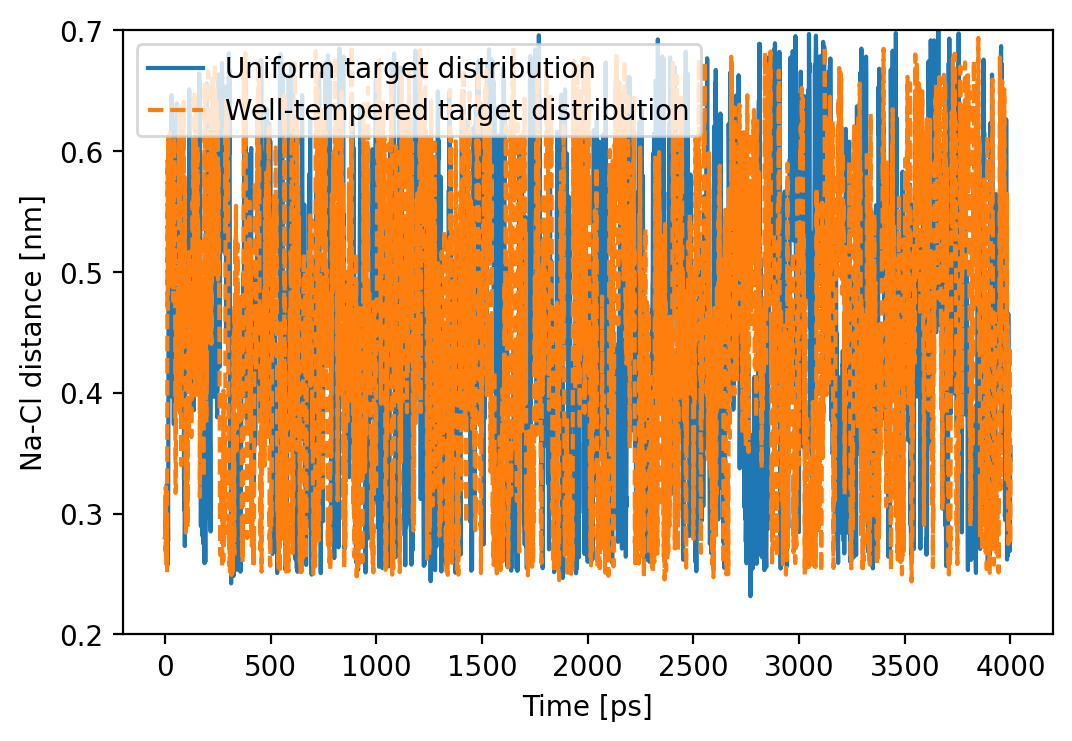

In [53]:
colvar_data = np.loadtxt("./Exercise-6/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
# the colvar file is outputted every 0.25 ps, only plot every 1.0 ps
plt.plot(time[::4],distance[::4],'-',label="Uniform target distribution")
plt.xlabel("Time [ps]")
plt.ylabel("Na-Cl distance [nm]")
plt.ylim([0.2,0.7])

colvar_data = np.loadtxt("./Exercise-1/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
plt.plot(time[::4],distance[::4],'--',label="Well-tempered target distribution")
plt.legend()

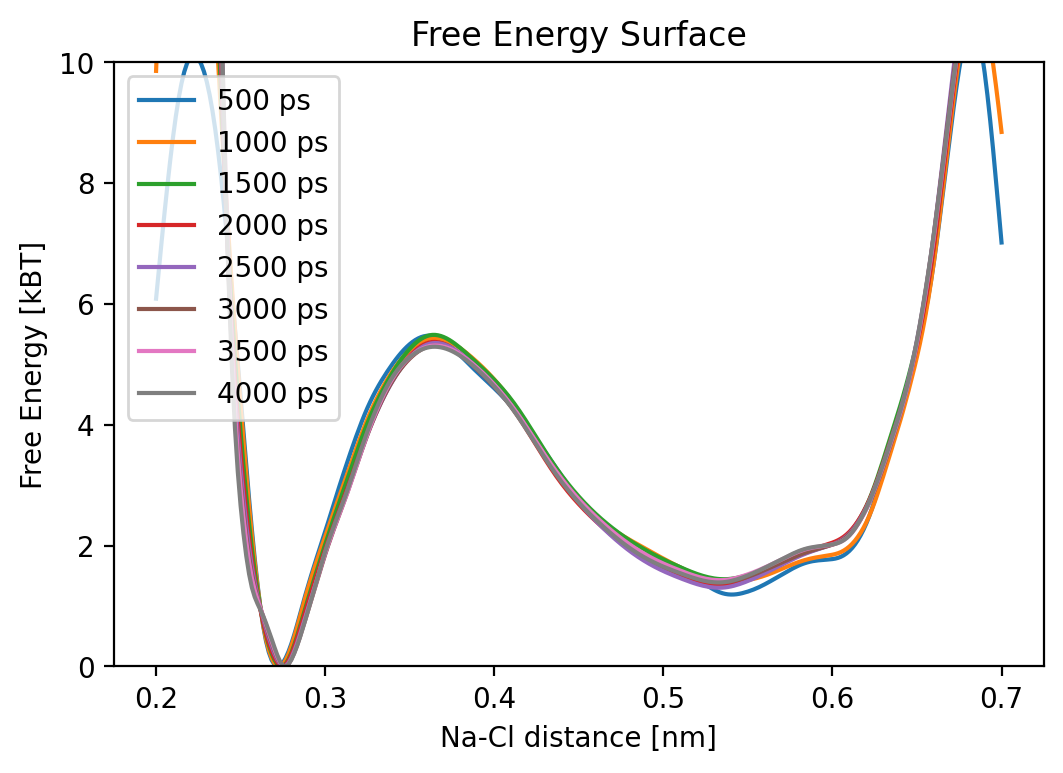

In [54]:
# Each iteration is 1 ps
for iter in range(500,4001,500):
    fes_data = np.loadtxt("./Exercise-6/fes.ves.iter-{0}.data".format(iter))
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Free Energy [kBT]")
    plt.legend()
    plt.title("Free Energy Surface")
    plt.ylim([0,10])

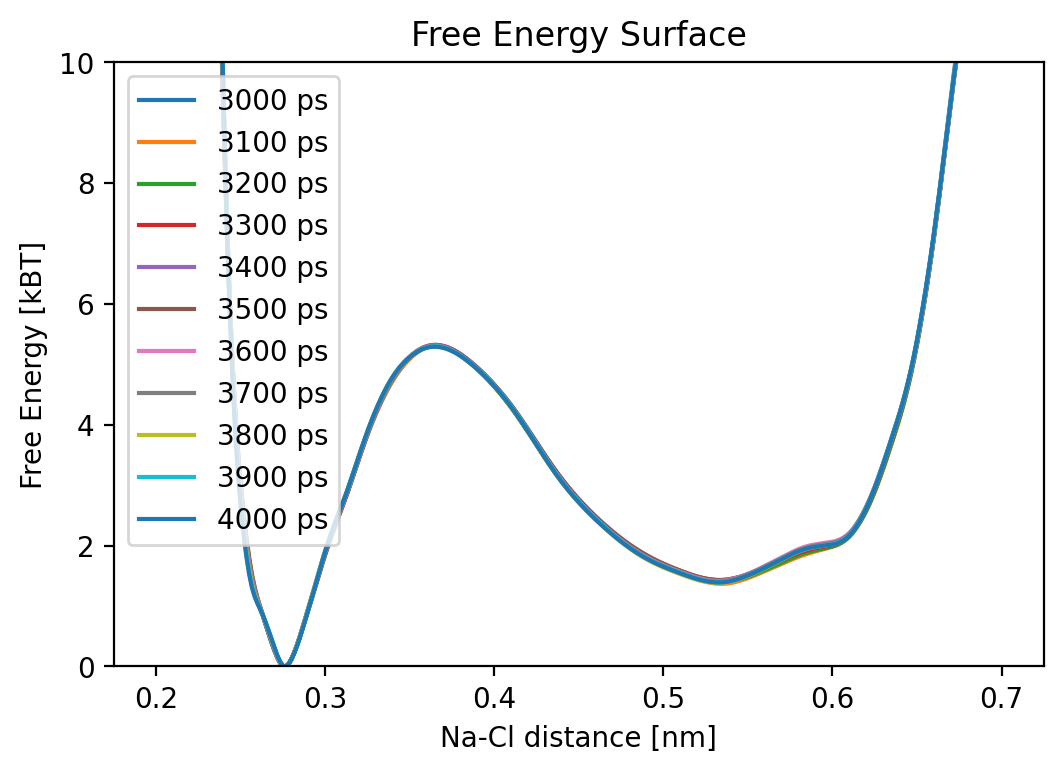

In [55]:
# Each iteration is 1 ps
for iter in range(3000,4001,100):
    fes_data = np.loadtxt("./Exercise-6/fes.ves.iter-{0}.data".format(iter))
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Free Energy [kBT]")
    plt.legend()
    plt.title("Free Energy Surface")
    plt.ylim([0,10])

In [56]:
%%bash
cd Exercise-6/
cat << EOF > plumed_reweight.kde.dat 
# vim:ft=plumed

dist:   READ FILE=colvar_reweight.data IGNORE_TIME VALUES=dist
coord:  READ FILE=colvar_reweight.data IGNORE_TIME VALUES=coord
ves:    READ FILE=colvar_reweight.data IGNORE_TIME VALUES=ves.bias

weights: REWEIGHT_BIAS TEMP=300 ARG=ves.bias

HISTOGRAM ...
  ARG=dist
  GRID_MIN=0.2
  GRID_MAX=0.9
  GRID_BIN=200
  BANDWIDTH=0.004
  LOGWEIGHTS=weights
  LABEL=hg_dist
... HISTOGRAM

fes_dist: CONVERT_TO_FES GRID=hg_dist TEMP=300 MINTOZERO
DUMPGRID GRID=fes_dist FILE=fes-reweight.kde.dist.data FMT=%24.16e
EOF

trim_time=500 
../Exercise-2/trim-colvar-file.py --colvar-file ./colvar.data --output-file colvar_reweight.data --time-min ${trim_time} &> /dev/null

plumed driver --plumed plumed_reweight.kde.dat --noatoms &> /dev/null
rm -f bck.*.fes-reweight.kde.dist.data


cd ..

(0.0, 10.0)

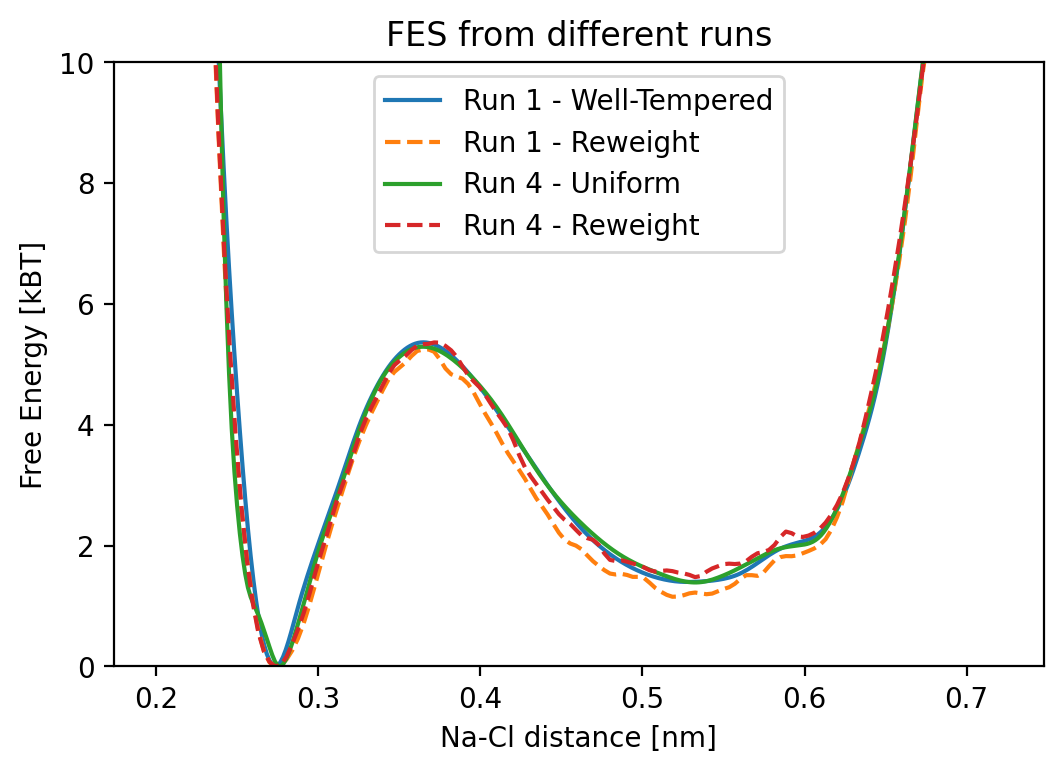

In [57]:
last_iter=4000

fes_data = np.loadtxt("./Exercise-1/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 1 - Well-Tempered")

fes_data = np.loadtxt("./Exercise-2/fes-reweight.kde.dist.data")
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 1 - Reweight",linestyle='--')

fes_data = np.loadtxt("./Exercise-6/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 4 - Uniform")

fes_data = np.loadtxt("./Exercise-6/fes-reweight.kde.dist.data")
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 4 - Reweight",linestyle='--')



plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Free Energy [kBT]")
plt.legend()
plt.title("FES from different runs")
plt.ylim([0,10])

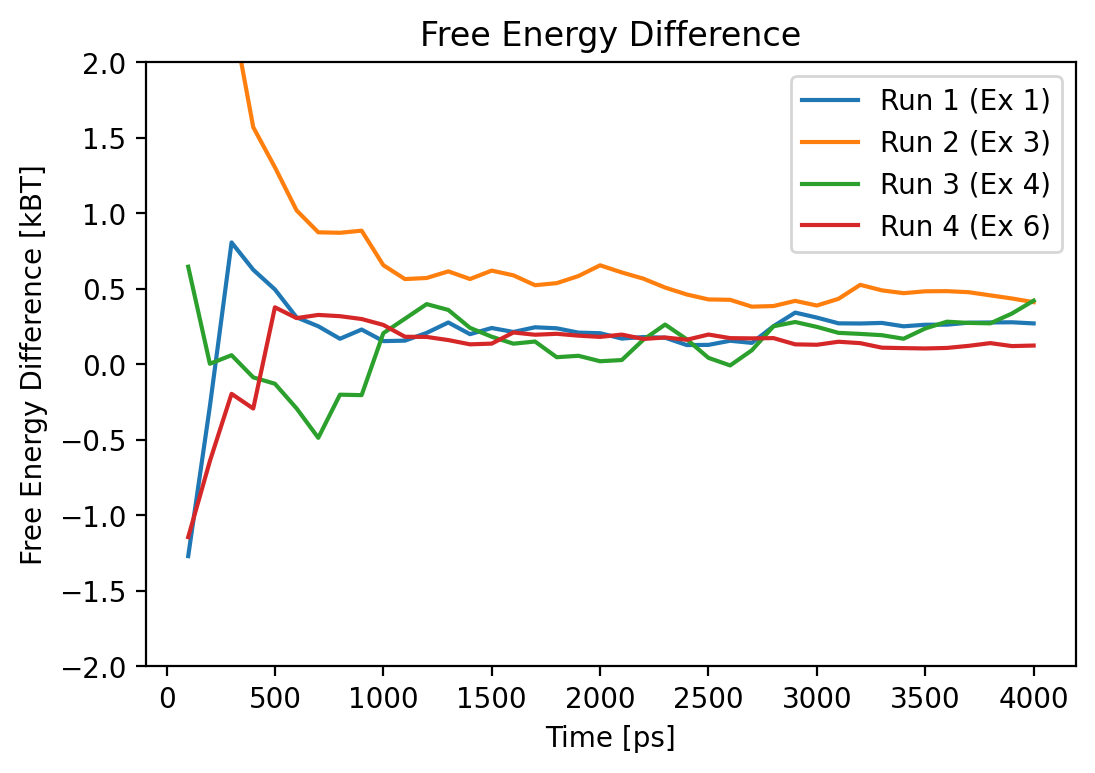

In [58]:
iteration_ex6=[]
free_energy_difference_ex6=[]

for iter in range(100,4001,100):
    iteration_ex6.append(iter)
    fes_filename="./Exercise-6/fes.ves.iter-{0}.data".format(iter)
    fe_diff = calc_free_energy_difference(fes_filename)
    free_energy_difference_ex6.append(fe_diff)

plt.plot(iteration_ex1,free_energy_difference_ex1,label="Run 1 (Ex 1)")
plt.plot(iteration_ex3,free_energy_difference_ex3,label="Run 2 (Ex 3)")
plt.plot(iteration_ex4,free_energy_difference_ex4,label="Run 3 (Ex 4)")
plt.plot(iteration_ex6,free_energy_difference_ex6,label="Run 4 (Ex 6)")
plt.xlabel("Time [ps]")
plt.ylabel("Free Energy Difference [kBT]")
plt.title("Free Energy Difference")
plt.ylim([-2.0,2.0])
plt.legend()

## Exercise 7 - Legendre Polynomials


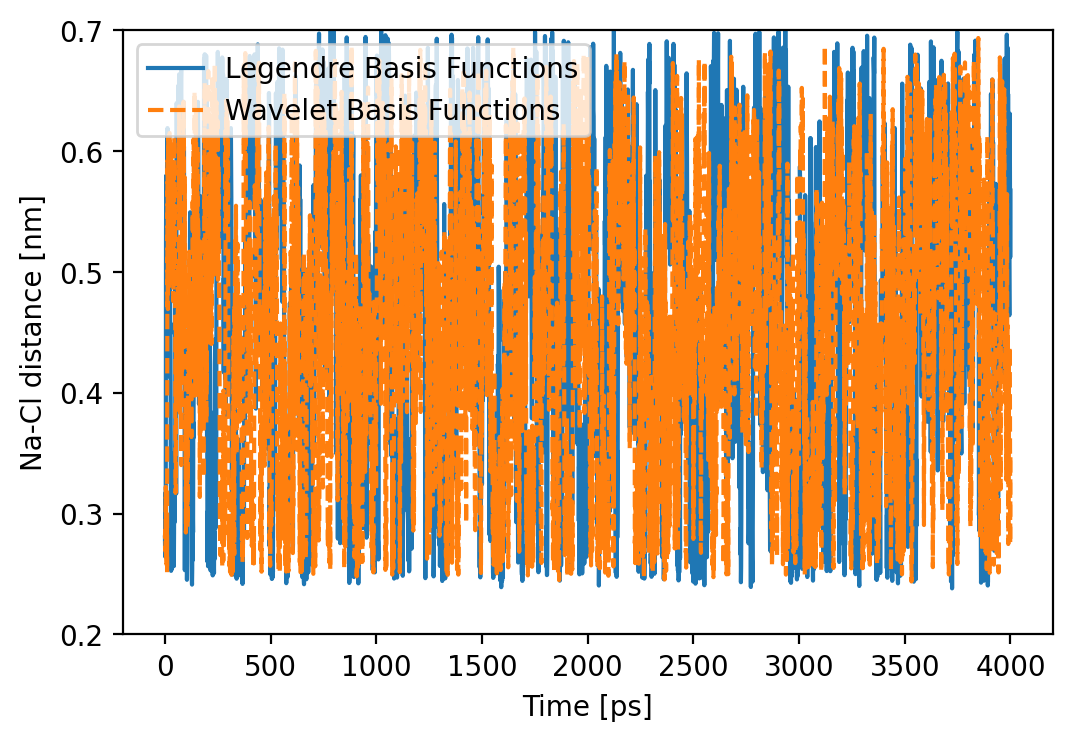

In [59]:
colvar_data = np.loadtxt("./Exercise-7/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
# the colvar file is outputted every 0.25 ps, only plot every 1.0 ps
plt.plot(time[::4],distance[::4],'-',label="Legendre Basis Functions")
plt.xlabel("Time [ps]")
plt.ylabel("Na-Cl distance [nm]")
plt.ylim([0.2,0.7])

colvar_data = np.loadtxt("./Exercise-1/colvar.data")
time = colvar_data[:,0]
distance = colvar_data[:,1]
coord = colvar_data[:,2]
plt.plot(time[::4],distance[::4],'--',label="Wavelet Basis Functions")
plt.legend()

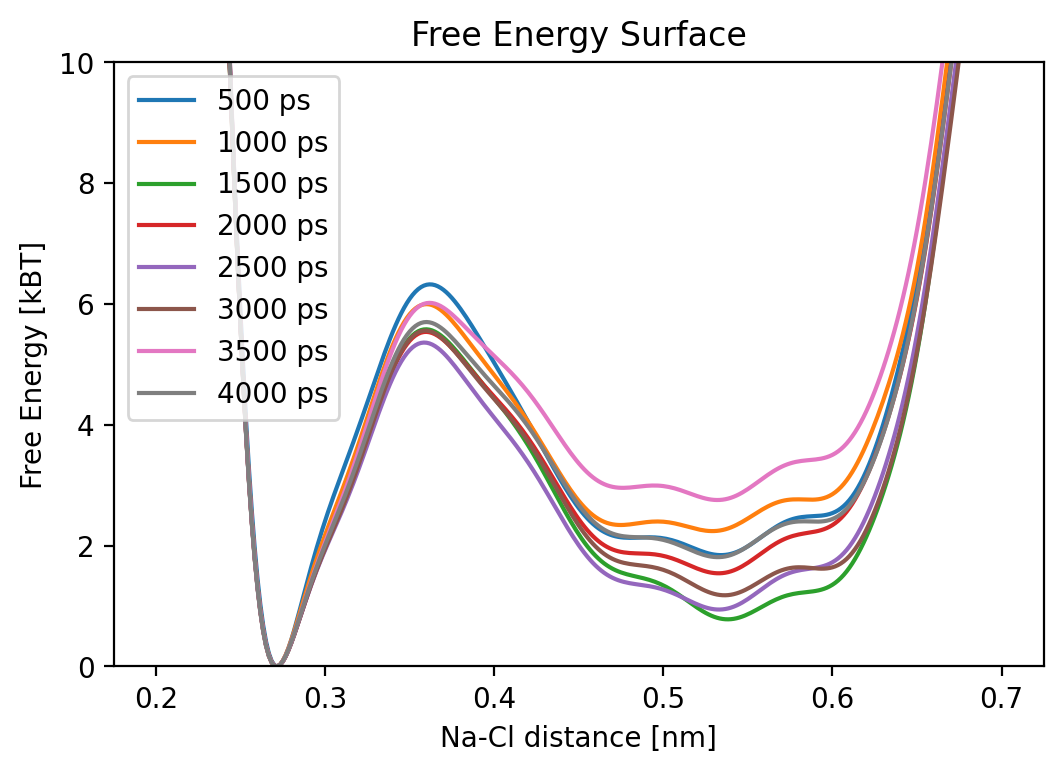

In [60]:
# Each iteration is 1 ps
for iter in range(500,4001,500):
    fes_data = np.loadtxt("./Exercise-7/fes.ves.iter-{0}.data".format(iter))
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Free Energy [kBT]")
    plt.legend()
    plt.title("Free Energy Surface")
    plt.ylim([0,10])

In [61]:
# Each iteration is 1 ps
for iter in range(3000,4001,100):
    fes_data = np.loadtxt("./Exercise-7/fes.ves.iter-{0}.data".format(iter))
    plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="{0} ps".format(iter))
    plt.xlabel("Na-Cl distance [nm]")
    plt.ylabel("Free Energy [kBT]")
    plt.legend()
    plt.title("Free Energy Surface")
    plt.ylim([0,10])

In [62]:
%%bash
cd Exercise-7/
cat << EOF > plumed_reweight.kde.dat 
# vim:ft=plumed

dist:   READ FILE=colvar_reweight.data IGNORE_TIME VALUES=dist
coord:  READ FILE=colvar_reweight.data IGNORE_TIME VALUES=coord
ves:    READ FILE=colvar_reweight.data IGNORE_TIME VALUES=ves.bias

weights: REWEIGHT_BIAS TEMP=300 ARG=ves.bias

HISTOGRAM ...
  ARG=dist
  GRID_MIN=0.2
  GRID_MAX=0.9
  GRID_BIN=200
  BANDWIDTH=0.004
  LOGWEIGHTS=weights
  LABEL=hg_dist
... HISTOGRAM

fes_dist: CONVERT_TO_FES GRID=hg_dist TEMP=300 MINTOZERO
DUMPGRID GRID=fes_dist FILE=fes-reweight.kde.dist.data FMT=%24.16e
EOF

trim_time=500 
../Exercise-2/trim-colvar-file.py --colvar-file ./colvar.data --output-file colvar_reweight.data --time-min ${trim_time} &> /dev/null

plumed driver --plumed plumed_reweight.kde.dat --noatoms &> /dev/null
rm -f bck.*.fes-reweight.kde.dist.data


cd ..

(0.0, 10.0)

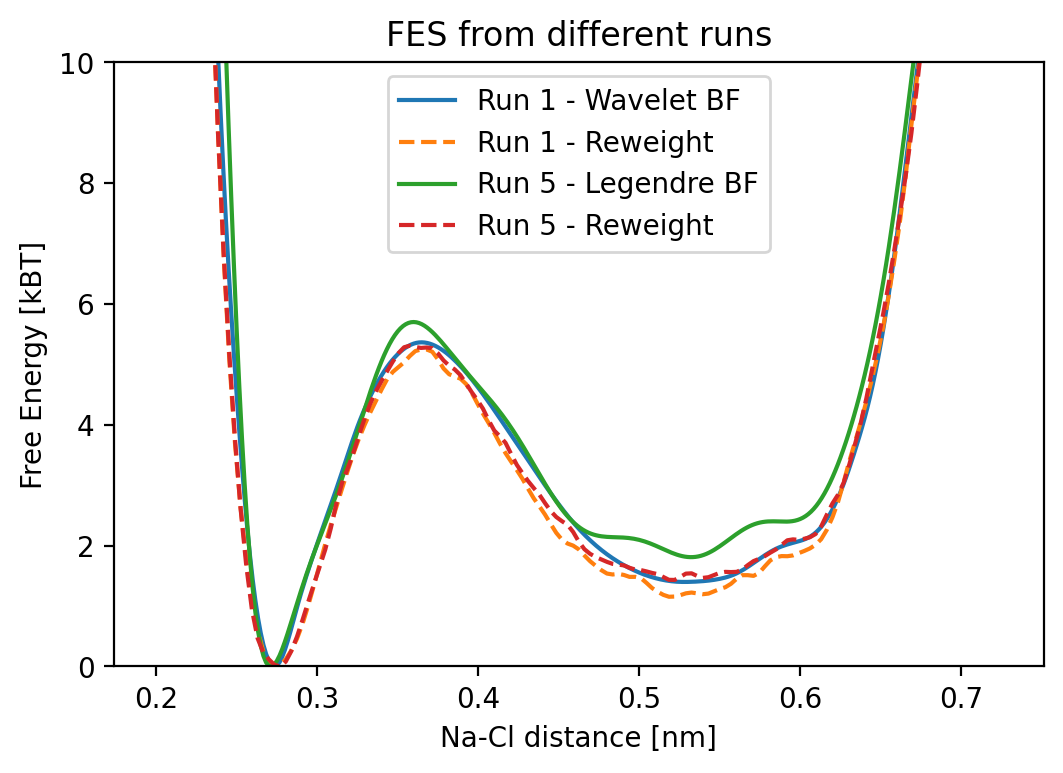

In [63]:
last_iter=4000

fes_data = np.loadtxt("./Exercise-1/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 1 - Wavelet BF")

fes_data = np.loadtxt("./Exercise-2/fes-reweight.kde.dist.data")
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 1 - Reweight",linestyle='--')

fes_data = np.loadtxt("./Exercise-7/fes.ves.iter-{0}.data".format(last_iter))
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 5 - Legendre BF")

fes_data = np.loadtxt("./Exercise-7/fes-reweight.kde.dist.data")
plt.plot(fes_data[:,0],fes_data[:,1]/kBT,label="Run 5 - Reweight",linestyle='--')



plt.xlabel("Na-Cl distance [nm]")
plt.ylabel("Free Energy [kBT]")
plt.legend()
plt.title("FES from different runs")
plt.ylim([0,10])

In [64]:
iteration_ex7=[]
free_energy_difference_ex7=[]

for iter in range(100,4001,100):
    iteration_ex7.append(iter)
    fes_filename="./Exercise-7/fes.ves.iter-{0}.data".format(iter)
    fe_diff = calc_free_energy_difference(fes_filename)
    free_energy_difference_ex7.append(fe_diff)

plt.plot(iteration_ex1,free_energy_difference_ex1,label="Run 1 (Ex 1)")
plt.plot(iteration_ex3,free_energy_difference_ex3,label="Run 2 (Ex 3)")
plt.plot(iteration_ex4,free_energy_difference_ex4,label="Run 3 (Ex 4)")
plt.plot(iteration_ex6,free_energy_difference_ex6,label="Run 4 (Ex 6)")
plt.plot(iteration_ex7,free_energy_difference_ex7,label="Run 5 (Ex 7)")
plt.xlabel("Time [ps]")
plt.ylabel("Free Energy Difference [kBT]")
plt.title("Free Energy Difference")
plt.ylim([-2.0,2.0])
plt.legend()